In [1242]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

from geopy.geocoders import Nominatim
import geopandas as gpd



In [1243]:
df= pd.read_csv(r"D:\Projects\Exhibit Art\Data\train.csv")


In [1244]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [1245]:
df.shape

(6500, 20)

In [1246]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [1247]:
df.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

In [1248]:
def replace_spaces_with_underscore(df):
    df = df.rename(columns=lambda x: x.replace(' ', '_'))
    return df

df=replace_spaces_with_underscore(df=df)



In [1249]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included',
       'Transport', 'Fragile', 'Customer_Information', 'Remote_Location',
       'Scheduled_Date', 'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

Column Labels 

In [1250]:
df.dtypes

Customer_Id               object
Artist_Name               object
Artist_Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price_Of_Sculpture       float64
Base_Shipping_Price      float64
International             object
Express_Shipment          object
Installation_Included     object
Transport                 object
Fragile                   object
Customer_Information      object
Remote_Location           object
Scheduled_Date            object
Delivery_Date             object
Customer_Location         object
Cost                     float64
dtype: object

In [1251]:
df.isna().sum()

Customer_Id                 0
Artist_Name                 0
Artist_Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price_Of_Sculpture          0
Base_Shipping_Price         0
International               0
Express_Shipment            0
Installation_Included       0
Transport                1392
Fragile                     0
Customer_Information        0
Remote_Location           771
Scheduled_Date              0
Delivery_Date               0
Customer_Location           0
Cost                        0
dtype: int64

Null value Dsitribution 

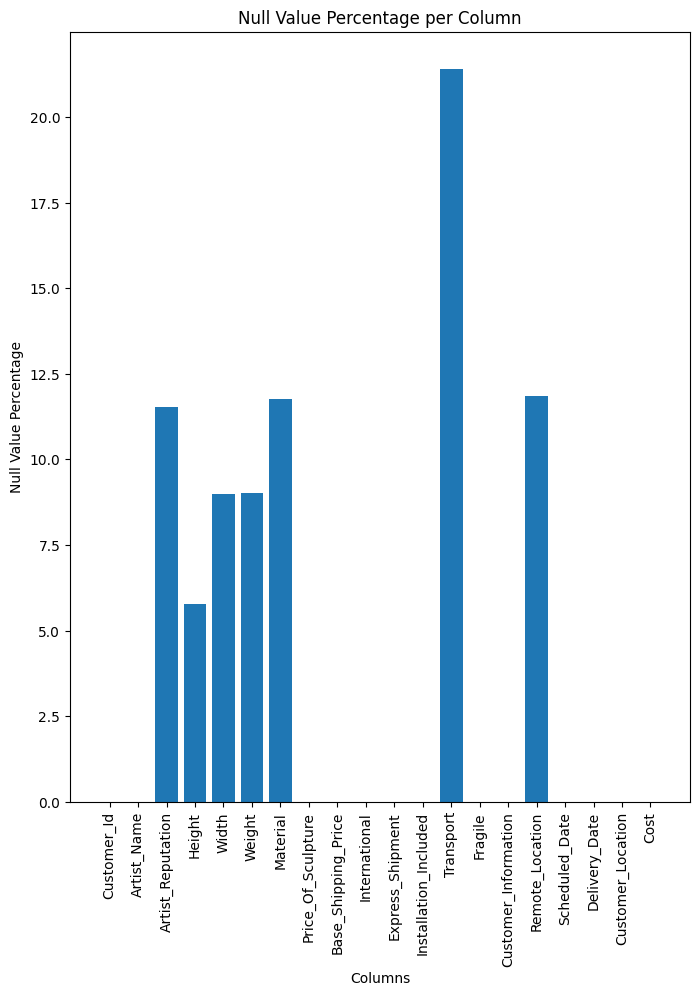

In [1252]:

def plot_null_percentage(dataframe):
    # Calculate null value percentage for each column
    null_percentage = dataframe.isnull().mean() * 100

    # Plotting
    plt.figure(figsize=(8, 10))  # Adjust the size of the plot as per your preference
    plt.bar(null_percentage.index, null_percentage.values)  # Use `plt.bar` instead of `plt.barh` to make it vertical
    plt.xlabel('Columns')
    plt.ylabel('Null Value Percentage')
    plt.title('Null Value Percentage per Column')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

plot_null_percentage(dataframe=df)


In [1253]:
df.drop(columns=['Transport'],axis=1,inplace=True)

Unique Value percentage 

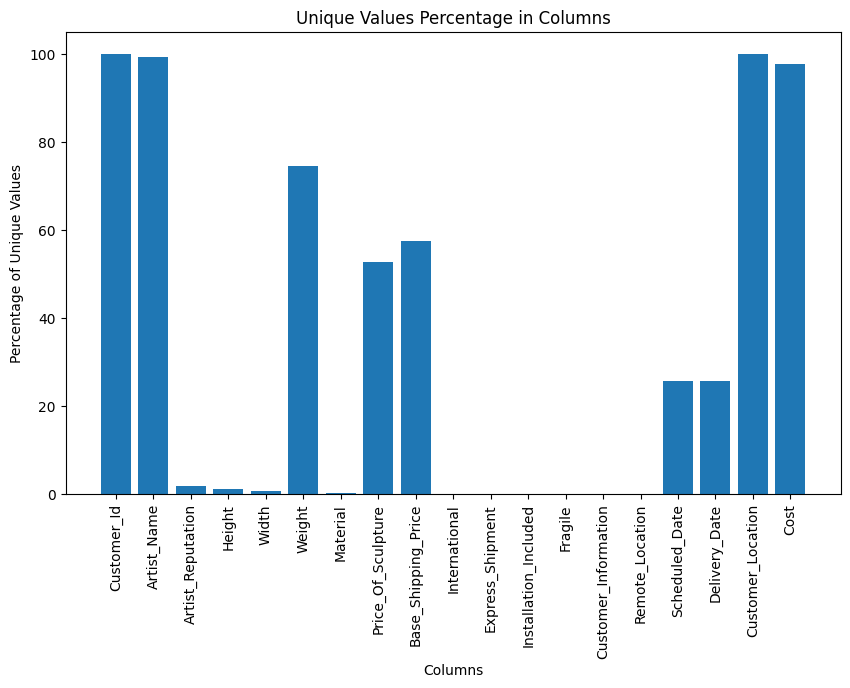

In [1254]:
def plot_unique_percentage(df):
    # Initialize an empty list to store unique percentages
    unique_percentages = []

    # Iterate over each column in the dataframe
    for column in df.columns:
        # Count the unique values in the column
        unique_values = df[column].nunique()
        # Get the total number of values in the column
        total_values = df[column].count()

        # Calculate the percentage of unique values
        unique_percentage = (unique_values / total_values) * 100
        unique_percentages.append(unique_percentage)

    # Plot the unique values percentages
    plt.figure(figsize=(10, 6))
    plt.bar(df.columns, unique_percentages)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Unique Values')
    plt.title('Unique Values Percentage in Columns')
    plt.xticks(rotation=90)
    plt.show()


plot_unique_percentage(df=df)
    
    


Dropping Irrelevant Columns

In [1255]:
df.head()

,Customer_Id,Artist_Name,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [1256]:

def separate_numerical_categorical_columns(df):
    numerical_columns = []
    categorical_columns = []

    for column in df.columns:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            numerical_columns.append(column)
        else:
            categorical_columns.append(column)

    return numerical_columns, categorical_columns
numerical_columns, categorical_columns=separate_numerical_categorical_columns(df=df)

In [1257]:
categorical_columns

['Customer_Id',
 'Artist_Name',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'Scheduled_Date',
 'Delivery_Date',
 'Customer_Location']

## Data Analysis

In [1131]:
def plot_scatter(data, x_column, y_column, x_label=None, y_label=None, title=None, color='blue', alpha=0.7):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=data, x=x_column, y=y_column, color=color, alpha=alpha)
    plt.xlabel(x_label if x_label else x_column)
    plt.ylabel(y_label if y_label else y_column)
    plt.title(title if title else f'Scatter Plot: {x_column} vs {y_column}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [1132]:
def plot_boxplot_histogram(df, column_label):
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    df.boxplot(column=column_label)
    plt.title(f'Box Plot of {column_label}')
    
    plt.subplot(1, 2, 2)
    df[column_label].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {column_label}')
    
    plt.tight_layout()
    plt.show()

In [1133]:

def plot_scatter_with_hue(df, x_column, y_column, hue_column):
    if x_column not in df.columns or y_column not in df.columns or hue_column not in df.columns:
        print("One or more of the specified columns not found in the DataFrame.")
        return
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_column, y=y_column, hue=hue_column)
    plt.title(f'Scatter Plot of {x_column} vs {y_column} (Hued by {hue_column})')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

### Numerical Columns

In [1134]:
numerical_columns

['Artist_Reputation',
 'Height',
 'Width',
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price',
 'Cost']

In [1135]:
df[numerical_columns].isna().sum()

Artist_Reputation      750
Height                 375
Width                  584
Weight                 587
Price_Of_Sculpture       0
Base_Shipping_Price      0
Cost                     0
dtype: int64

In [1136]:
df

,Customer_Id,Artist_Name,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335",872.43
6496,fffe310036003400,Larry Edwards,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766",1347.02
6497,fffe3600300031003300,Denise Worth,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,Yes,Wealthy,No,04/10/19,04/09/19,"Lake Kelly, MA 80823",354.55
6498,fffe3600350035003900,Daniel Drew,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,No,Working Class,Yes,03/10/19,03/12/19,"Hintonberg, UT 35006",5037.50


In [1137]:
def replace_nan_with_random(df, column_label):
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return df
    
    original_data = df[column_label].copy()
    nan_indices = df[df[column_label].isna()].index
    num_nan = len(nan_indices)
    
    existing_values = original_data.dropna().values
    random_values = np.random.choice(existing_values, num_nan)

    df.loc[nan_indices, column_label] = random_values
    
    original_mean = original_data.mean()
    original_median = original_data.median()
    new_mean = df[column_label].mean()
    new_median = df[column_label].median()
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title("Before Replacement")
    original_data.plot(kind='hist', edgecolor='black')
    plt.axvline(x=original_mean, color='r', linestyle='dashed', linewidth=2, label='Original Mean')
    plt.axvline(x=original_median, color='g', linestyle='dashed', linewidth=2, label='Original Median')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.title("After Replacement")
    df[column_label].plot(kind='hist', edgecolor='black')
    plt.axvline(x=new_mean, color='b', linestyle='dashed', linewidth=2, label='New Mean')
    plt.axvline(x=new_median, color='m', linestyle='dashed', linewidth=2, label='New Median')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.title("Comparison of Means and Medians")
    plt.bar(['Original Mean', 'New Mean', 'Original Median', 'New Median'], [original_mean, new_mean, original_median, new_median])
    
    plt.tight_layout()
    plt.show()

    return df

In [1138]:

def trim_outliers_by_quantile(df, column_label, lower_quantile=0.05, upper_quantile=0.95):
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return df
    
    column_data = df[column_label]
    
    lower_bound = column_data.quantile(lower_quantile)
    upper_bound = column_data.quantile(upper_quantile)
    
    trimmed_data = column_data.clip(lower=lower_bound, upper=upper_bound)
    
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Box Plot - Before Trimming")
    sns.boxplot(y=column_data)
    
    plt.subplot(1, 3, 2)
    plt.title("Box Plot - After Trimming")
    sns.boxplot(y=trimmed_data)
    
    plt.subplot(1, 3, 3)
    plt.title("KDE Plot - Before vs After Trimming")
    sns.kdeplot(column_data, label='Before Trimming', shade=True)
    sns.kdeplot(trimmed_data, label='After Trimming', shade=True)
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    df[column_label] = trimmed_data

    return df




Artist Reputation

In [1139]:
df['Artist_Reputation']

0       0.26
1       0.28
2       0.07
3       0.12
4       0.15
        ... 
6495    0.37
6496    0.67
6497    0.68
6498    0.02
6499    0.18
Name: Artist_Reputation, Length: 6500, dtype: float64

Artish reputation is observed to the 0-1
- Closer to 1 highly reputed 
- Close to 0 less reputed

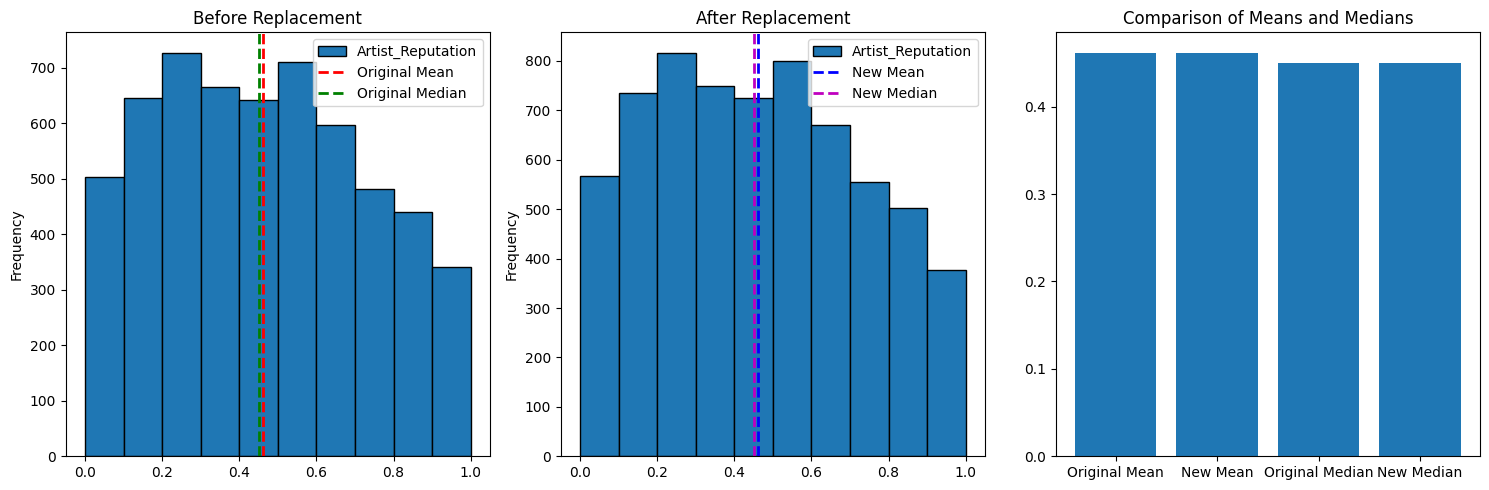

In [1140]:
df=replace_nan_with_random(df=df,column_label='Artist_Reputation')


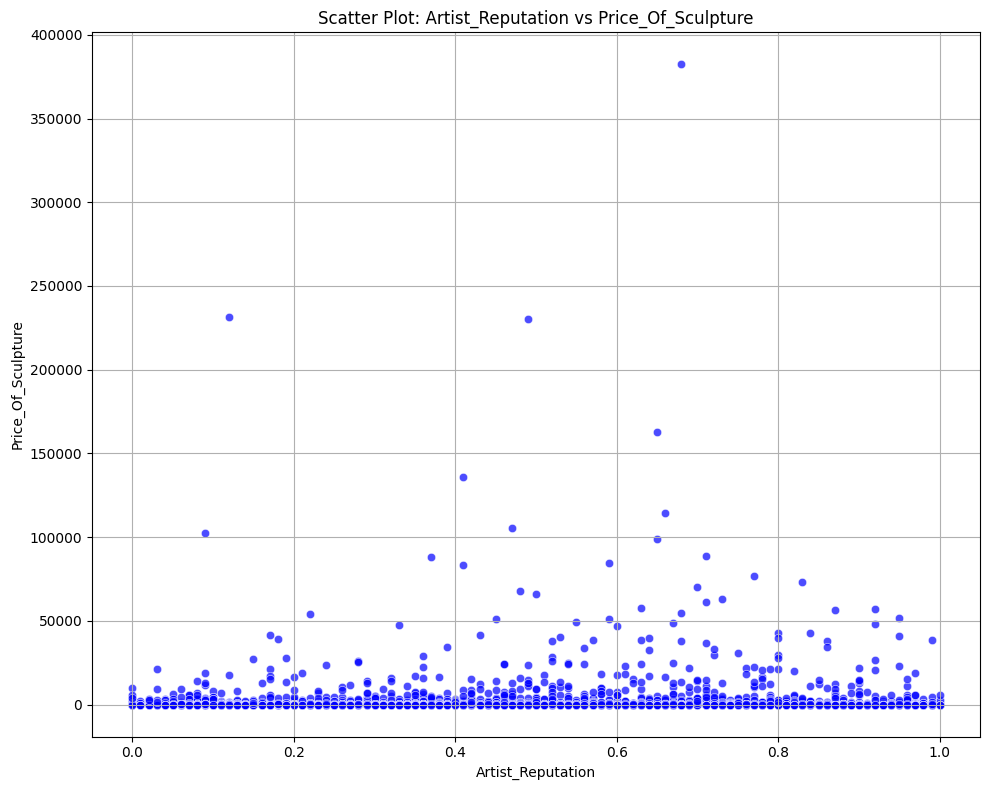

In [1141]:
plot_scatter(data=df,x_column='Artist_Reputation',y_column='Price_Of_Sculpture')

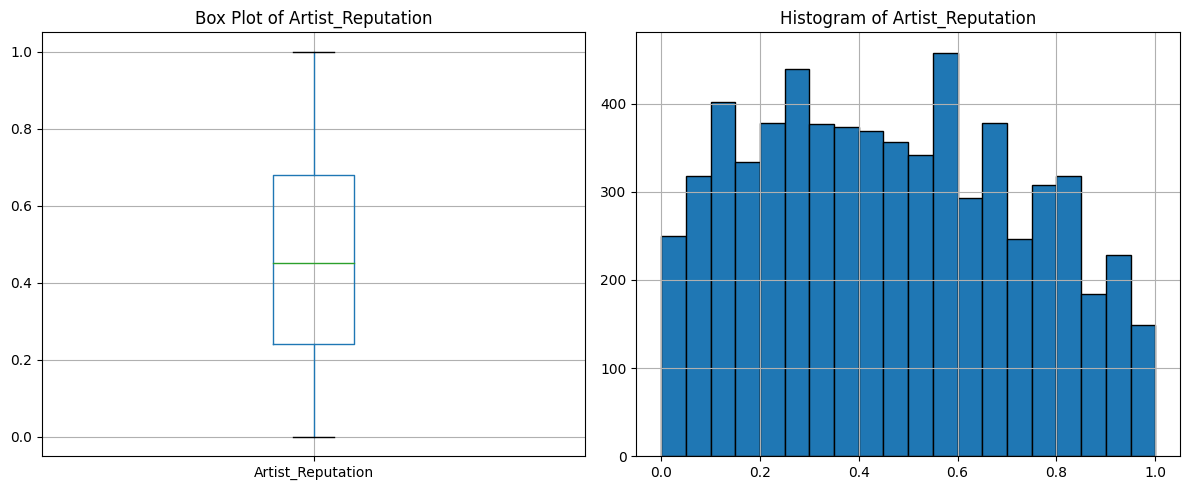

In [1142]:
plot_boxplot_histogram(df=df,column_label='Artist_Reputation')

Height

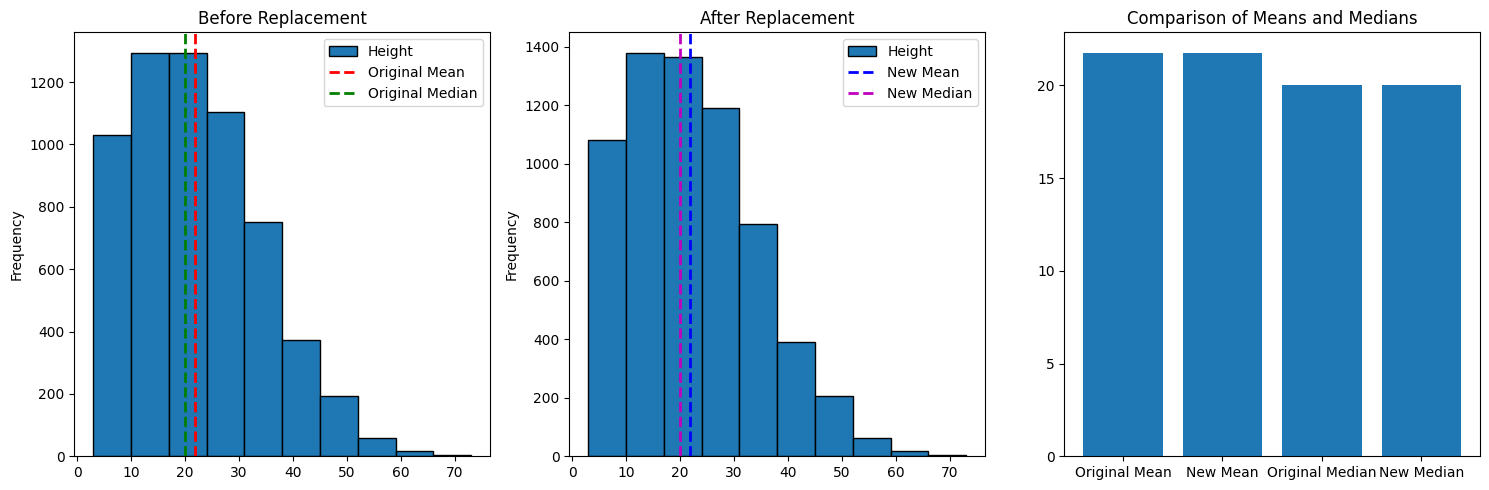

In [1143]:
df=replace_nan_with_random(df=df,column_label='Height')


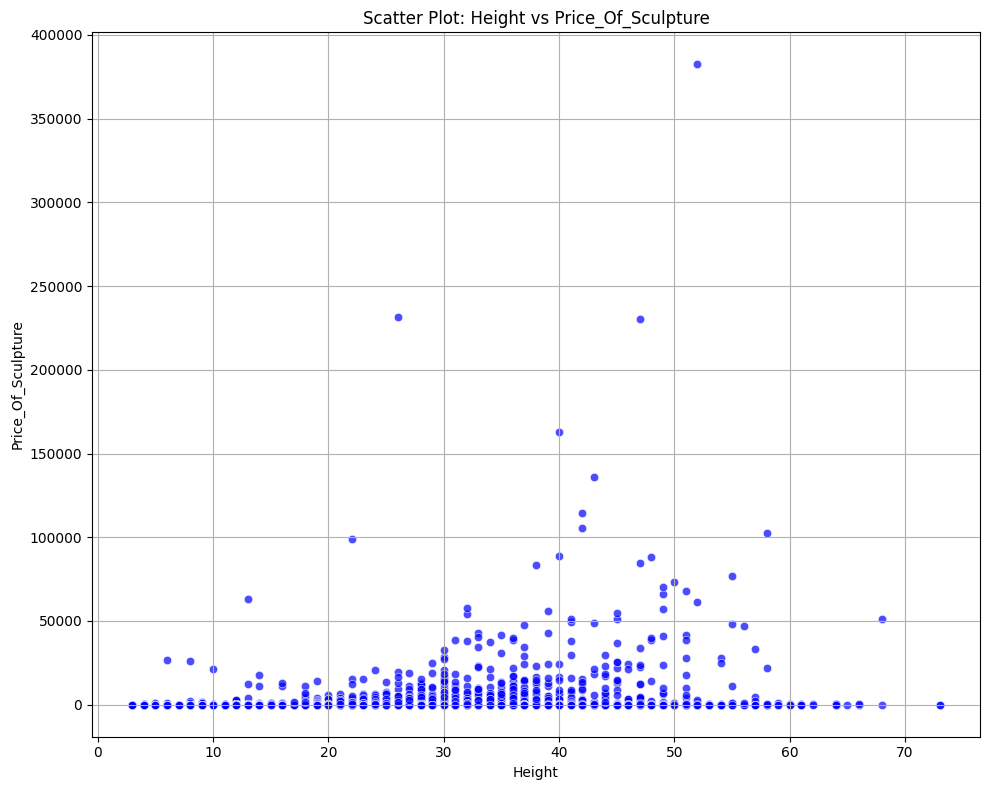

In [1144]:

plot_scatter(data=df,x_column='Height',y_column='Price_Of_Sculpture')

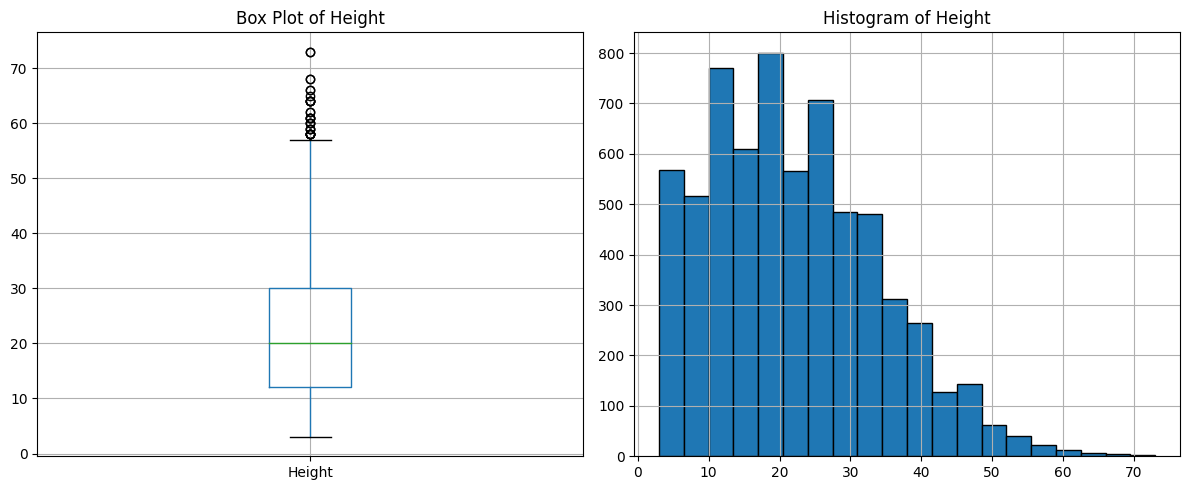

In [1145]:
plot_boxplot_histogram(df=df,column_label='Height')

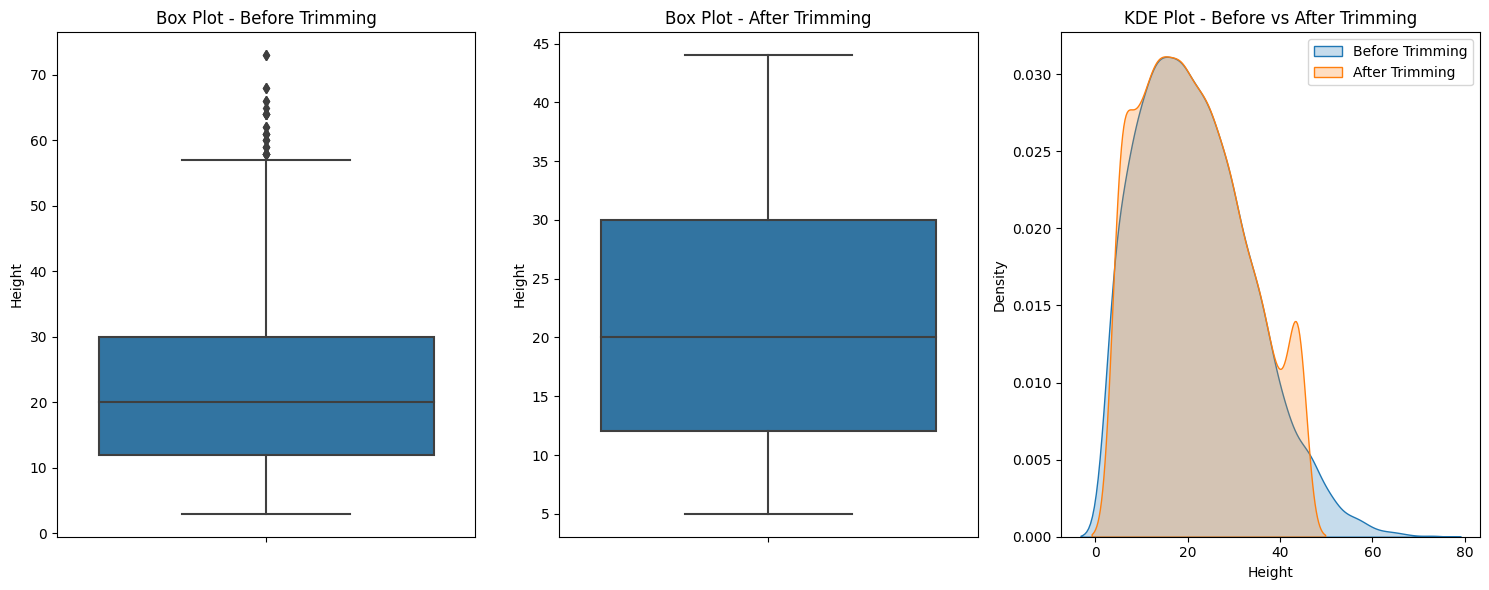

In [1146]:
df=trim_outliers_by_quantile(df=df,column_label='Height')


Width

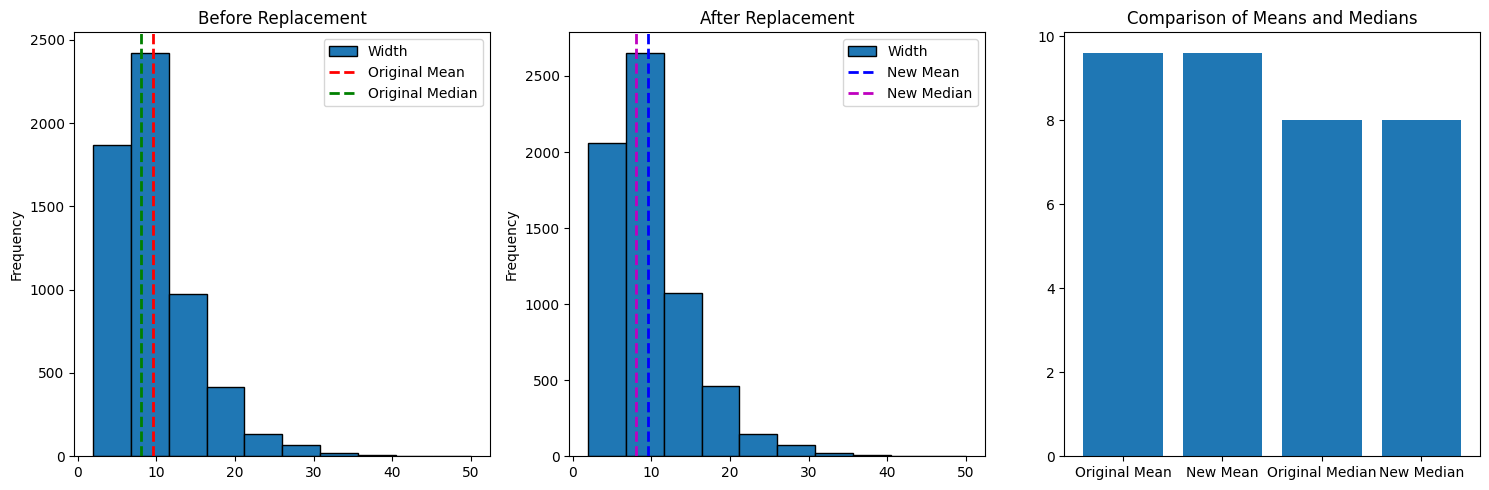

In [1147]:
df=replace_nan_with_random(df=df,column_label='Width')


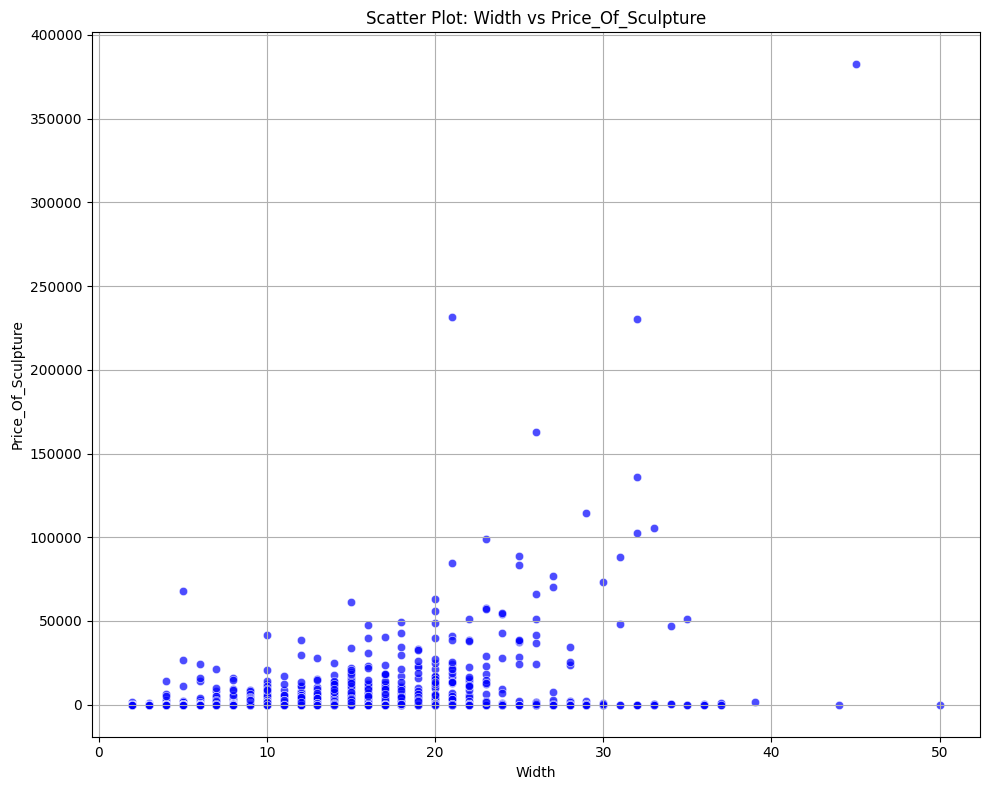

In [1148]:

plot_scatter(data=df,x_column='Width',y_column='Price_Of_Sculpture')

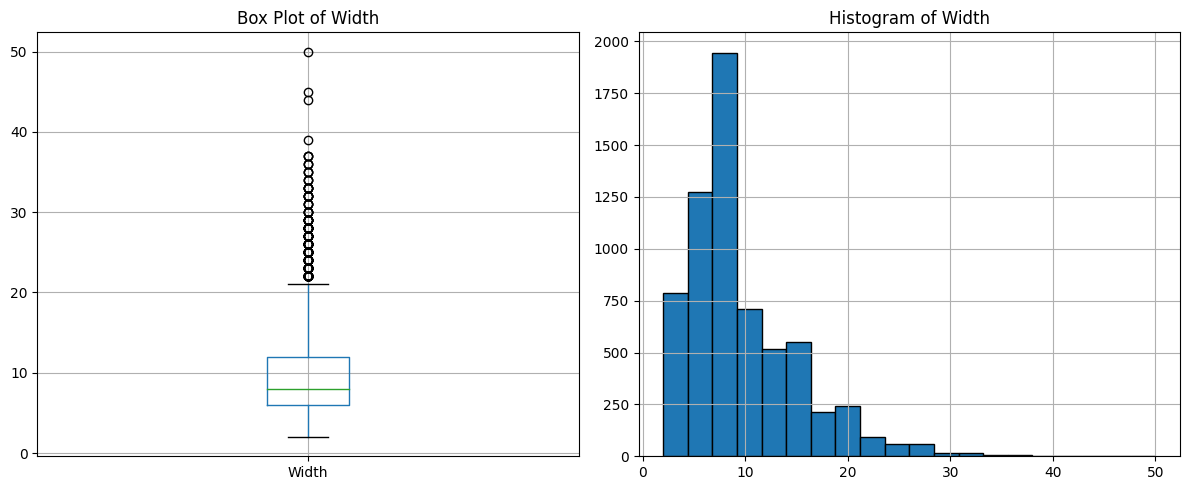

In [1149]:
plot_boxplot_histogram(df=df,column_label='Width')

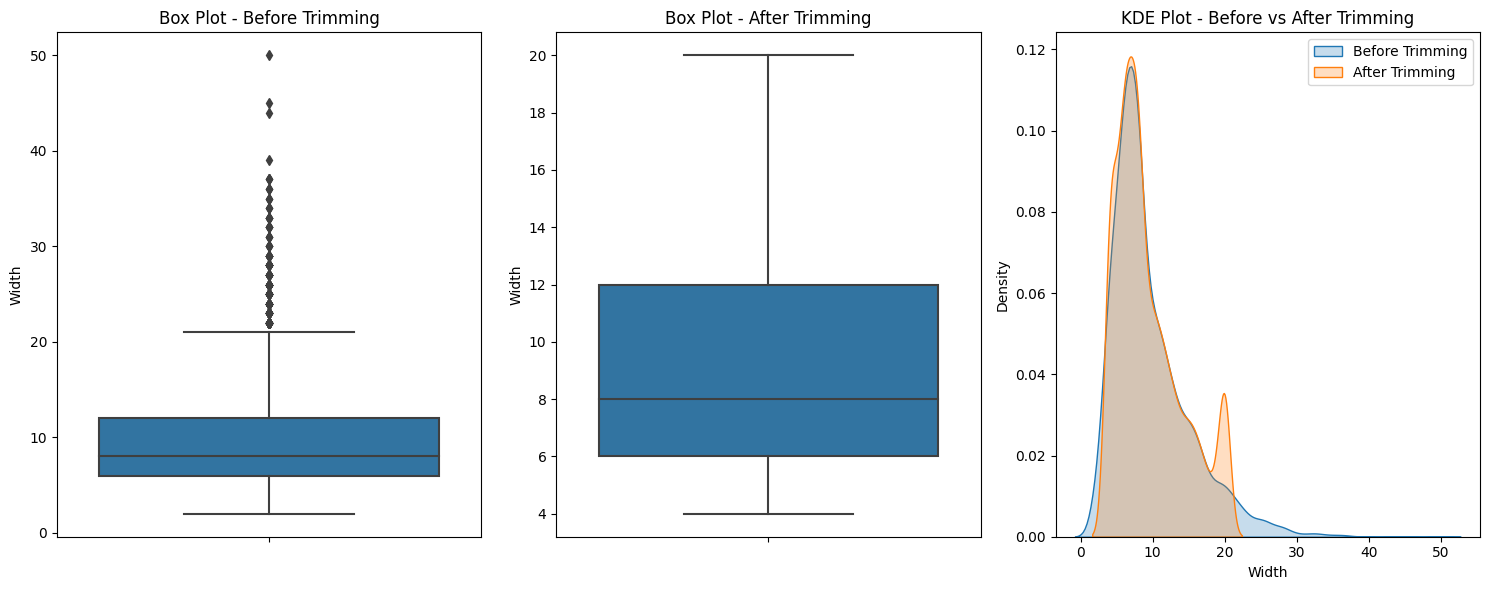

In [1150]:
df=trim_outliers_by_quantile(df=df,column_label='Width')


In [1151]:
df.shape

(6500, 19)

Price_Of_Sculpture

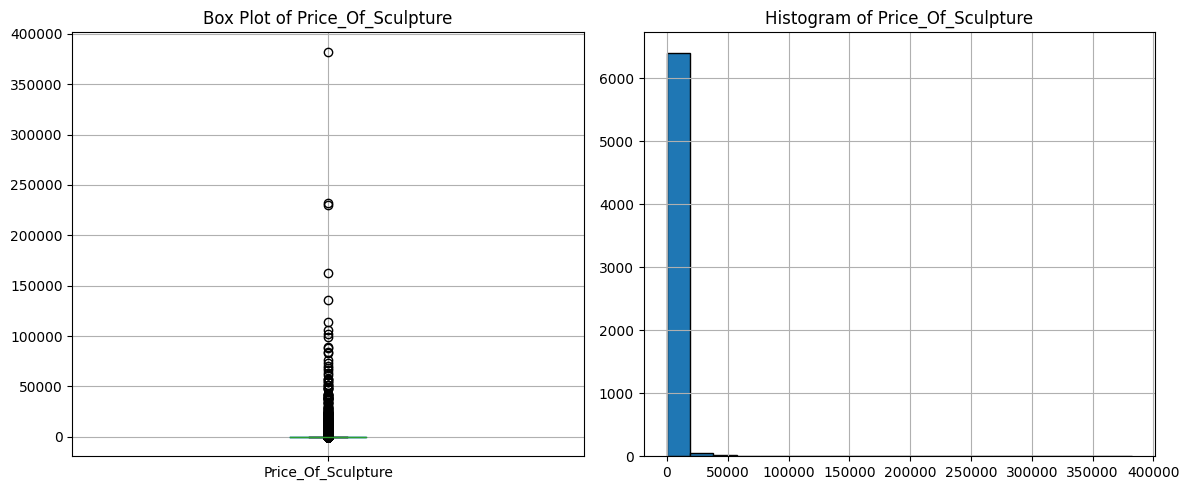

In [1152]:
plot_boxplot_histogram(df=df,column_label='Price_Of_Sculpture')

Price of the Sculpture is observed to be very incosistent and large variation can be observed

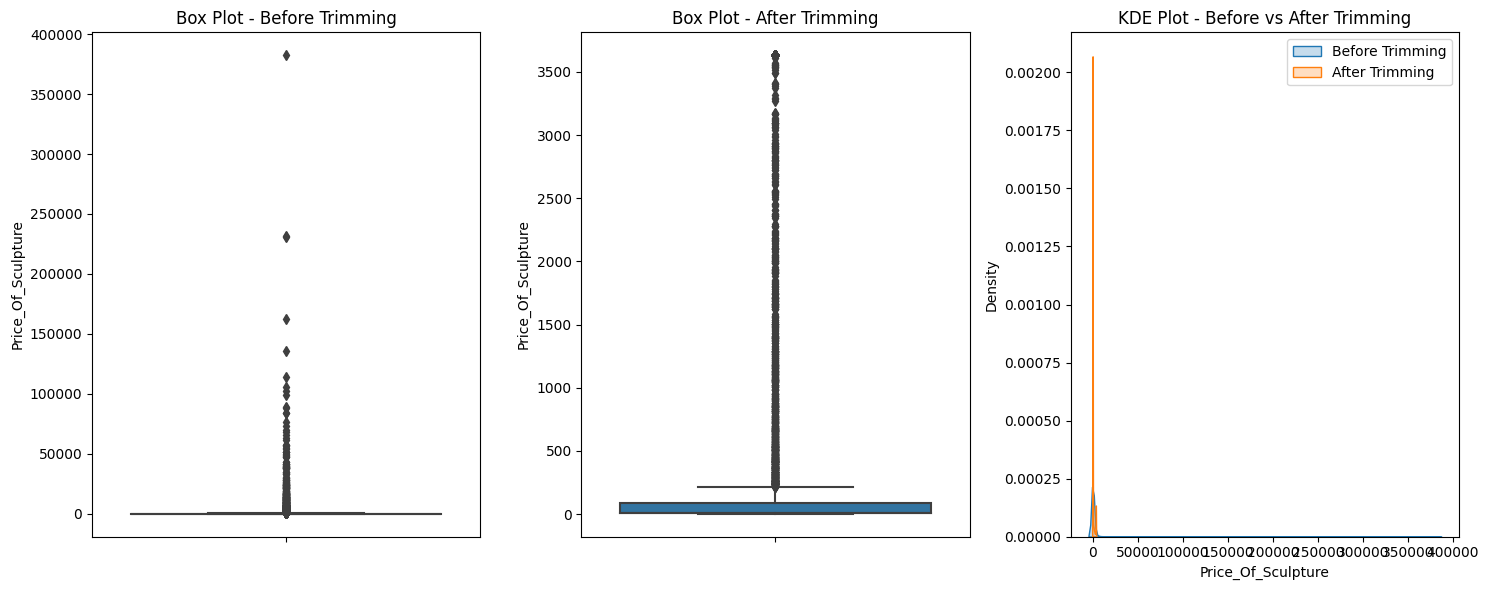

In [1153]:
df=trim_outliers_by_quantile(df=df,column_label='Price_Of_Sculpture')


Base_Shipping_Price

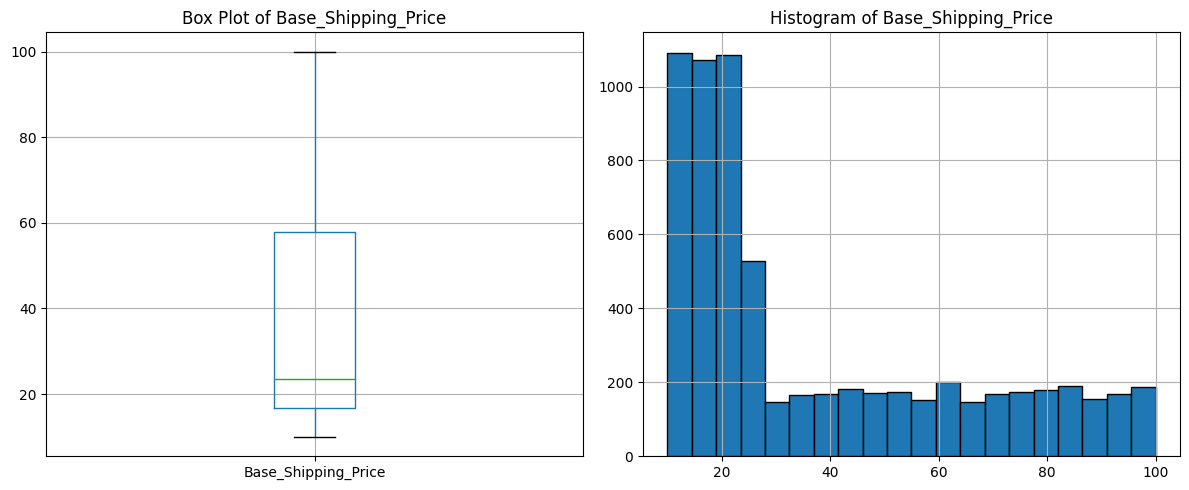

In [1154]:
plot_boxplot_histogram(df=df,column_label='Base_Shipping_Price')

Base shipping Price seems to have sconsistent Range and very less outliers can be observed here

Cost

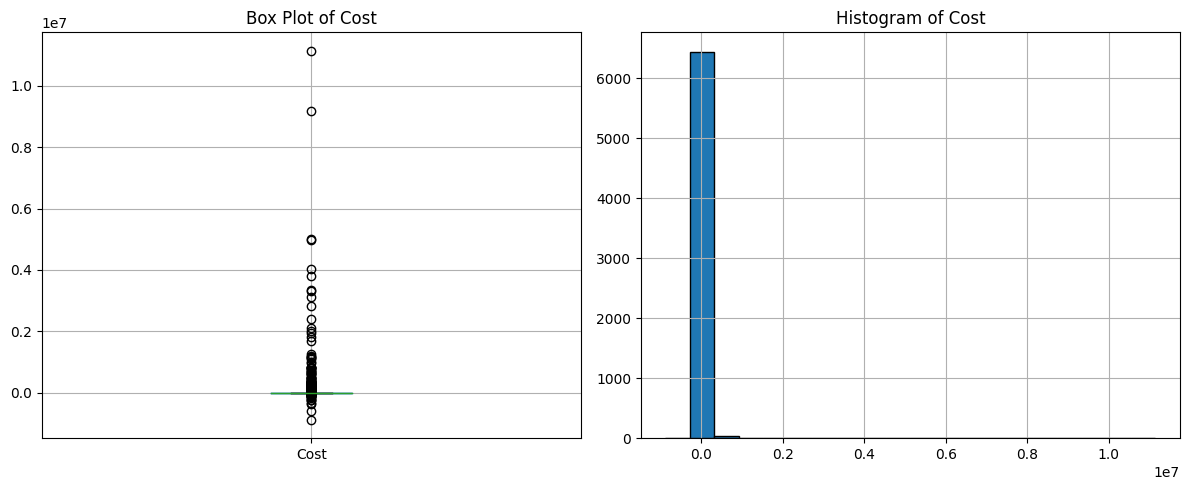

In [1155]:
plot_boxplot_histogram(df=df,column_label='Cost')

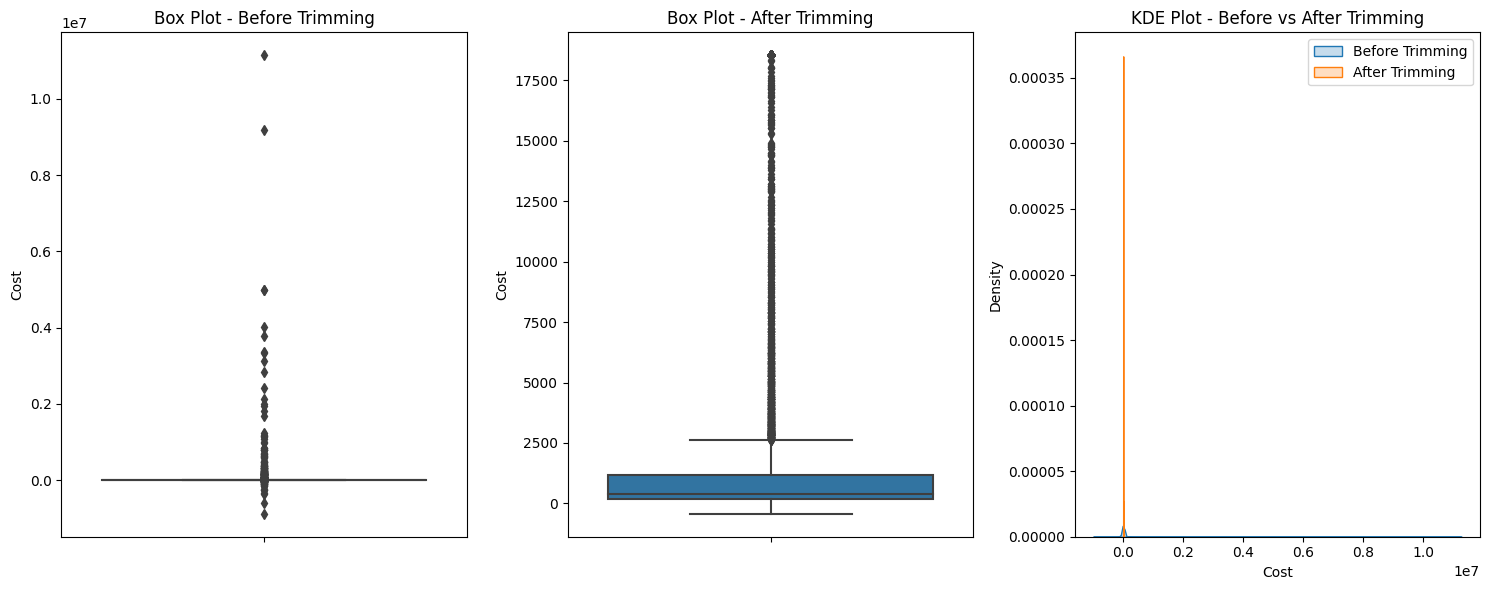

In [1156]:
df=trim_outliers_by_quantile(df=df,column_label='Cost')


Cost can be observed to have negative values in some cases 

Dropping rows having no data of weight 

In [1157]:
# Drop rows with NaN values in the 'Weight' column
df.dropna(subset=['Weight'], inplace=True)


Weight

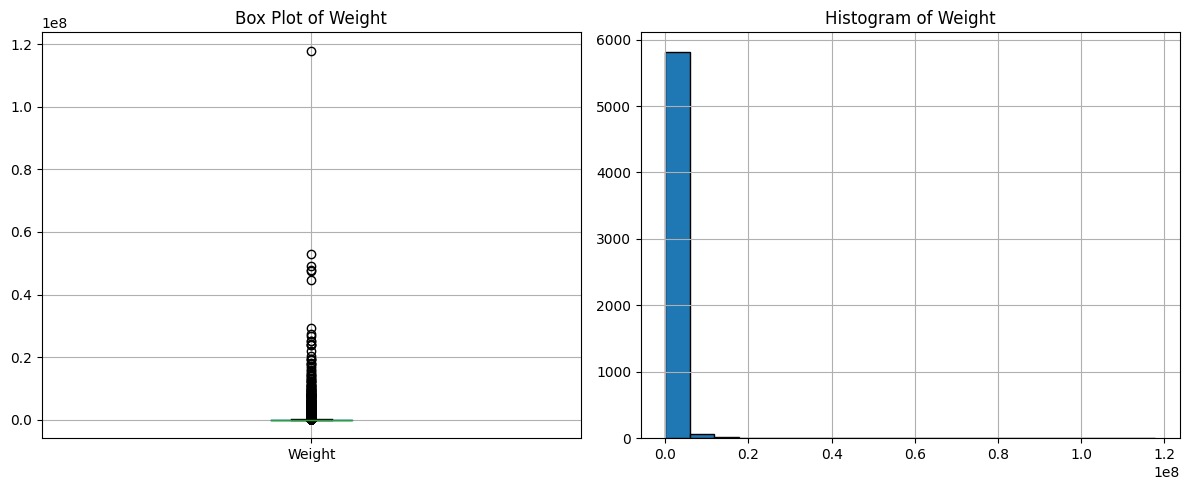

In [1158]:
plot_boxplot_histogram(df=df,column_label='Weight')

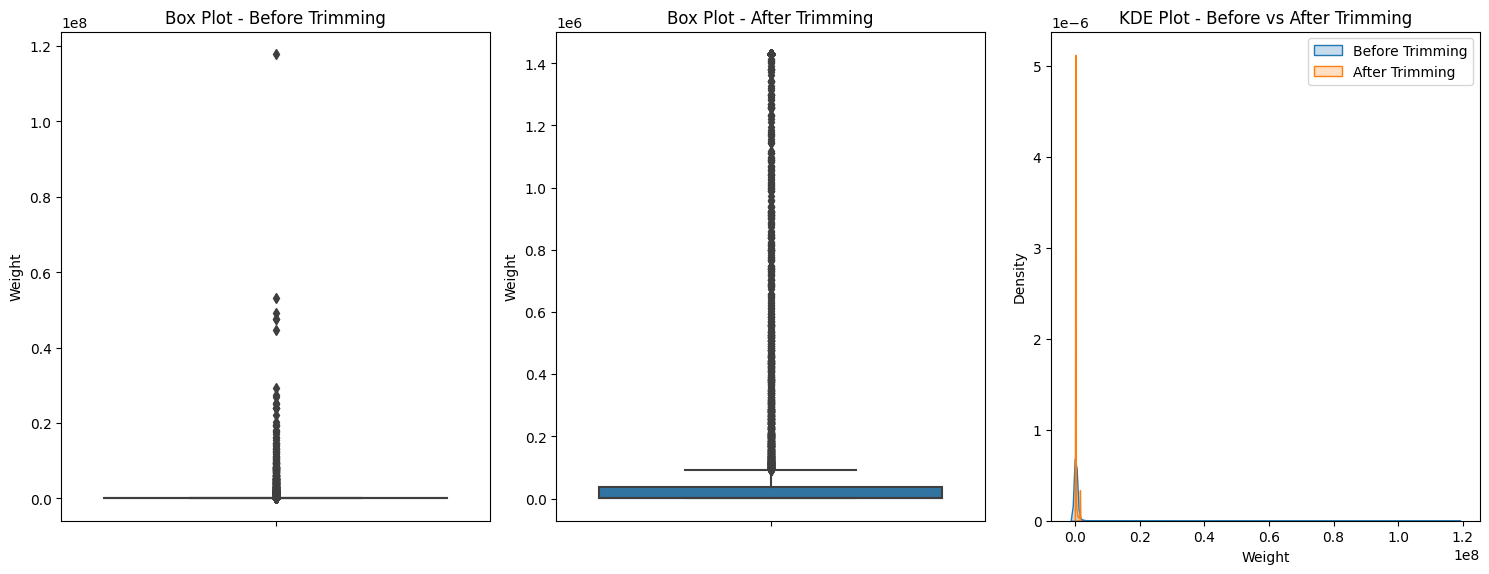

In [1159]:
df=trim_outliers_by_quantile(df=df,column_label='Weight')


In [1160]:
def plot_histogram(data, column_label):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column_label], kde=True)
    plt.xlabel(column_label)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_label}')
    plt.show()

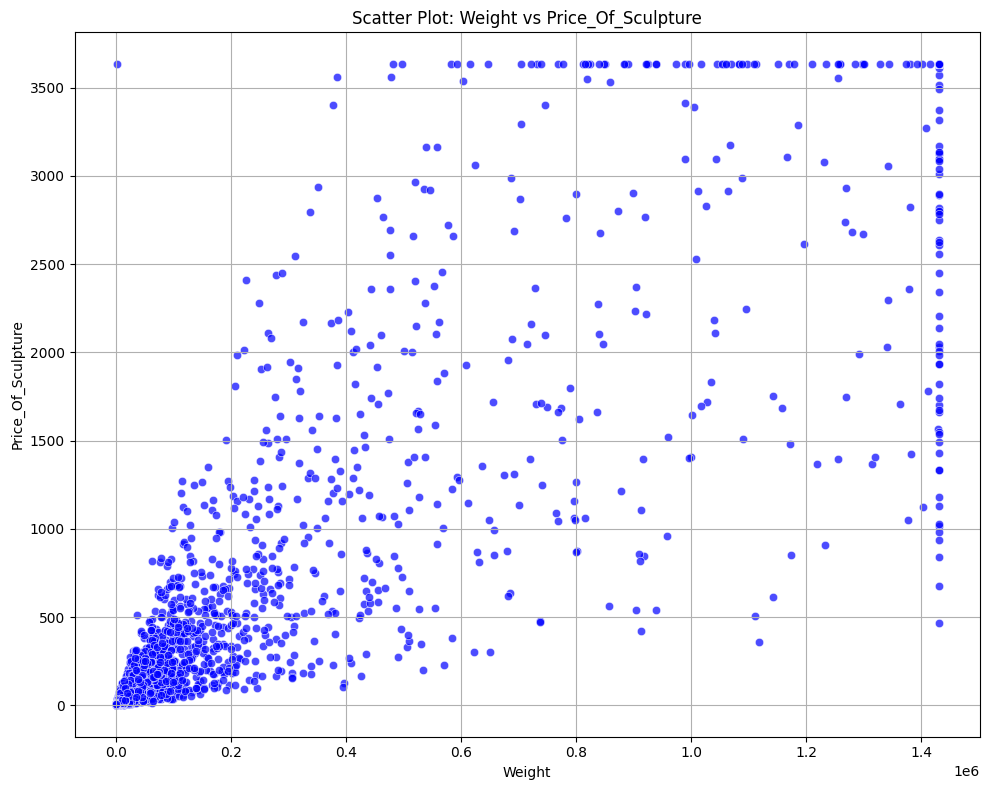

In [1161]:
plot_scatter(data=df,x_column='Weight',y_column='Price_Of_Sculpture')

In [1162]:
def plot_histogram_boxplot_side_by_side(df, column_list):
    num_columns = len(column_list)
    
    # Set up the figure with subplots
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(12, 6 * num_columns))
    plt.subplots_adjust(hspace=0.5)

    for i, column in enumerate(column_list):
        # Plot histogram
        sns.histplot(data=df, x=column, ax=axes[i, 0], bins=20)
        axes[i, 0].set_title(f'Histogram of {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Frequency')

        # Plot box plot
        sns.boxplot(data=df, y=column, ax=axes[i, 1])
        axes[i, 1].set_title(f'Box Plot of {column}')
        axes[i, 1].set_ylabel(column)

    plt.tight_layout()
    plt.show()

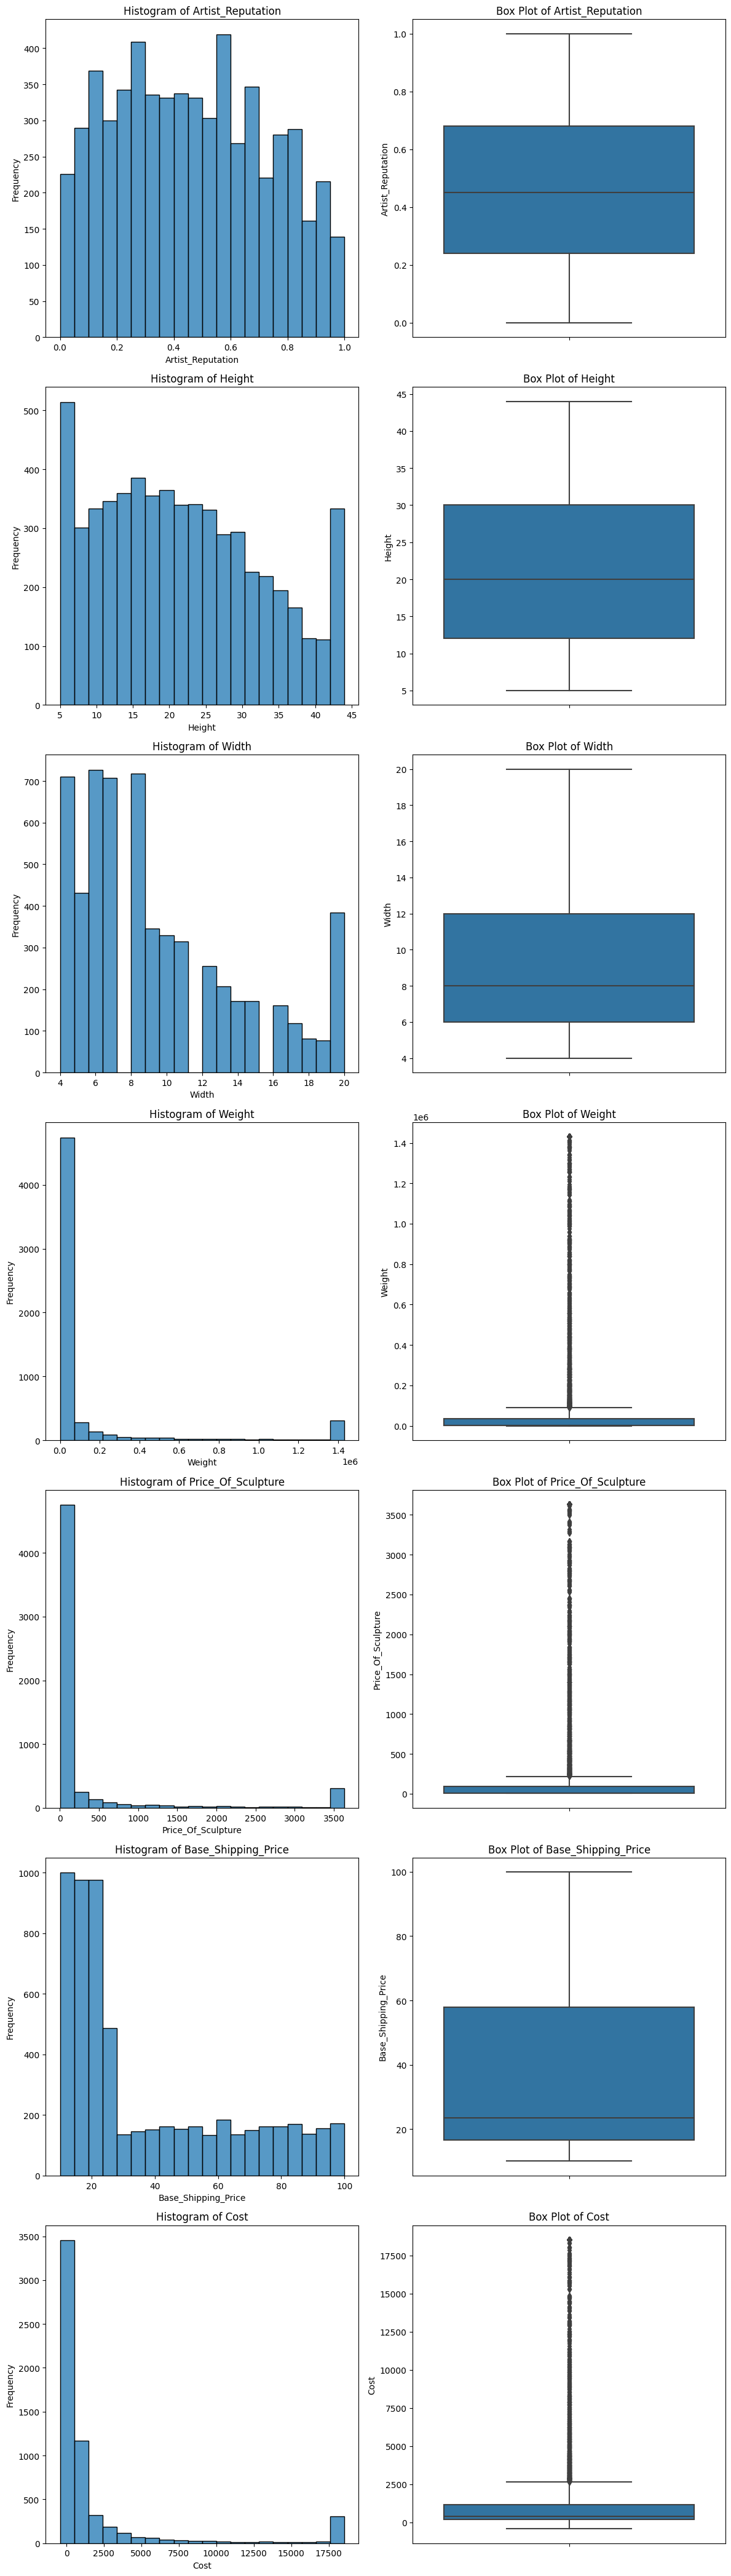

In [1163]:
plot_histogram_boxplot_side_by_side(df=df,column_list=numerical_columns)

In [1164]:
df.head()

,Customer_Id,Artist_Name,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.290
1,fffe3800330031003900,Jean Bryant,0.28,5.0,4.0,63.6,Brass,6.83,15.00,No,No,No,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.960
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.290
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.44,11.94,Yes,Yes,Yes,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.230
5,fffe3300390039003900,Tracy Francis,0.99,44.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",-432.166


Target Column

In [1165]:
def plot_kde(data, column_label, label=None, color='blue'):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data[column_label], label=label, color=color, shade=True)
    plt.xlabel(column_label)
    plt.ylabel('Density')
    plt.title(f'KDE Plot: {label if label else column_label}')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


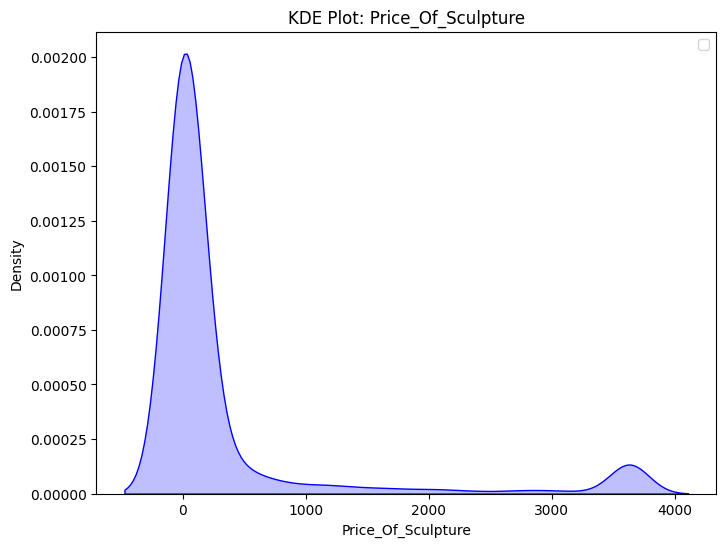

In [1166]:
plot_kde(data=df,column_label='Price_Of_Sculpture')

Unique Values

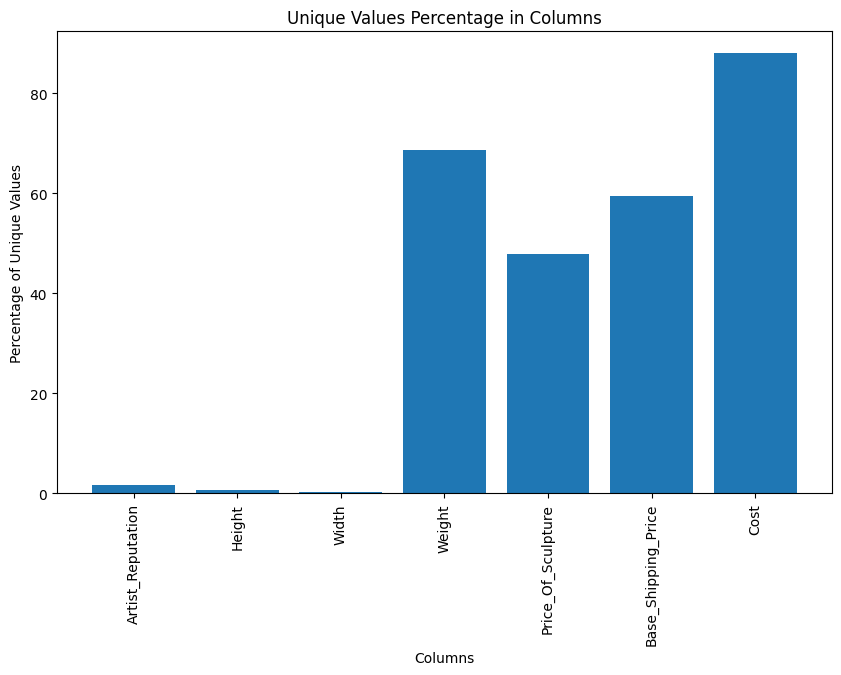

In [1167]:
plot_unique_percentage(df=df[numerical_columns])

##### Numerical Columns

Artist Reputation

In [1168]:
df[['Artist_Reputation']]

,Artist_Reputation
0,0.26
1,0.28
2,0.07
4,0.15
5,0.99
...,...
6495,0.37
6496,0.67
6497,0.68
6498,0.02


Artist reputation score is oberved between 0-1
- Artist having more score tend to have high market value and with less score tend to have low market vlaue


Hence checking if price of prodcut might have relation with this data

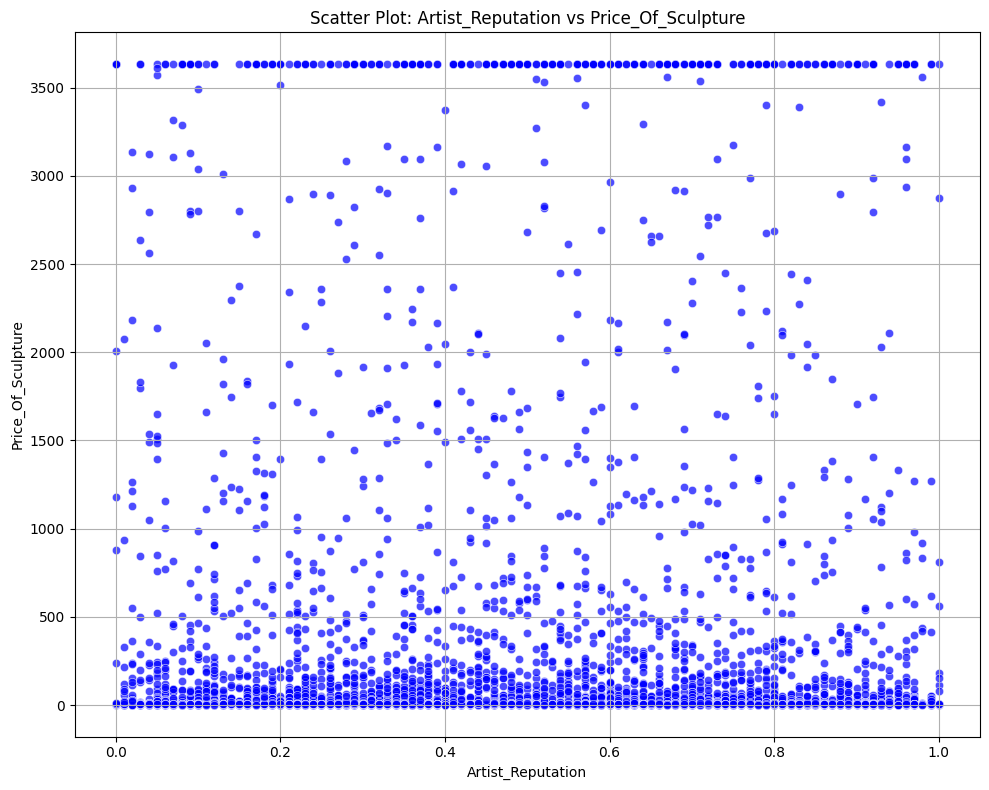

In [1169]:
plot_scatter(data=df,x_column='Artist_Reputation',y_column='Price_Of_Sculpture')

Price of Sculpture seems to be independednt of Artist Reputation

In [1170]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included', 'Fragile',
       'Customer_Information', 'Remote_Location', 'Scheduled_Date',
       'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

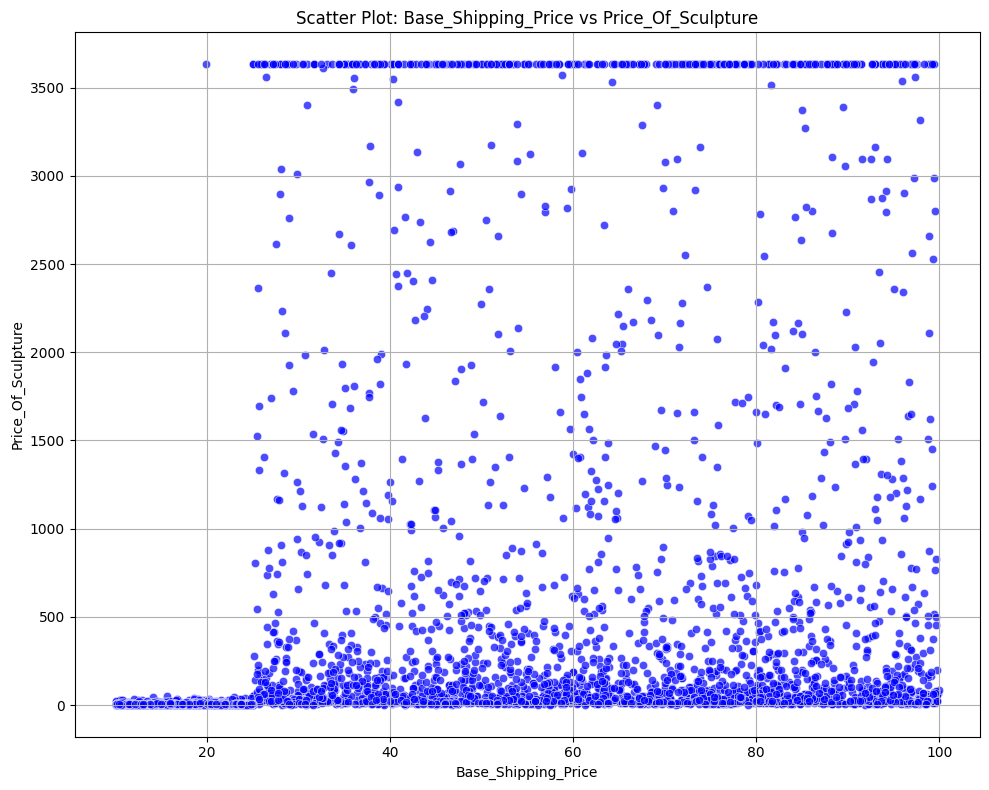

In [1171]:
plot_scatter(data=df,x_column='Base_Shipping_Price',y_column='Price_Of_Sculpture')

In [1172]:
df.isna().sum()

Customer_Id                0
Artist_Name                0
Artist_Reputation          0
Height                     0
Width                      0
Weight                     0
Material                 653
Price_Of_Sculpture         0
Base_Shipping_Price        0
International              0
Express_Shipment           0
Installation_Included      0
Fragile                    0
Customer_Information       0
Remote_Location          672
Scheduled_Date             0
Delivery_Date              0
Customer_Location          0
Cost                       0
dtype: int64

In [1173]:
df

,Customer_Id,Artist_Name,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.290
1,fffe3800330031003900,Jean Bryant,0.28,5.0,4.0,63.6,Brass,6.83,15.00,No,No,No,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.960
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.290
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.44,11.94,Yes,Yes,Yes,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.230
5,fffe3300390039003900,Tracy Francis,0.99,44.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",-432.166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335",872.430
6496,fffe310036003400,Larry Edwards,0.67,15.0,6.0,18981.0,NaN,67.18,27.72,No,No,No,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766",1347.020
6497,fffe3600300031003300,Denise Worth,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,Yes,Wealthy,No,04/10/19,04/09/19,"Lake Kelly, MA 80823",354.550
6498,fffe3600350035003900,Daniel Drew,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,No,Working Class,Yes,03/10/19,03/12/19,"Hintonberg, UT 35006",5037.500


In [1174]:
df.shape

(5913, 19)

In [1175]:
df = df.reset_index(drop=True)


In [1176]:
df.isna().sum()

Customer_Id                0
Artist_Name                0
Artist_Reputation          0
Height                     0
Width                      0
Weight                     0
Material                 653
Price_Of_Sculpture         0
Base_Shipping_Price        0
International              0
Express_Shipment           0
Installation_Included      0
Fragile                    0
Customer_Information       0
Remote_Location          672
Scheduled_Date             0
Delivery_Date              0
Customer_Location          0
Cost                       0
dtype: int64

### Categorical Columns

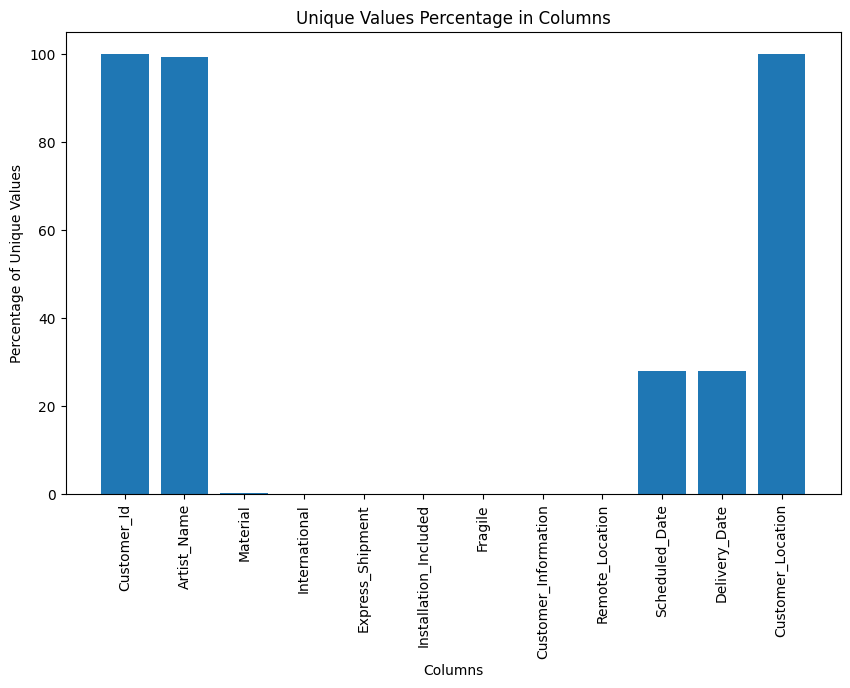

In [1177]:
plot_unique_percentage(df=df[categorical_columns])

In [1178]:
df[categorical_columns].isna().sum()

Customer_Id                0
Artist_Name                0
Material                 653
International              0
Express_Shipment           0
Installation_Included      0
Fragile                    0
Customer_Information       0
Remote_Location          672
Scheduled_Date             0
Delivery_Date              0
Customer_Location          0
dtype: int64

In [1179]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included', 'Fragile',
       'Customer_Information', 'Remote_Location', 'Scheduled_Date',
       'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

In [1180]:
df.drop(columns=['Customer_Id','Artist_Name'],axis=1,inplace=True)


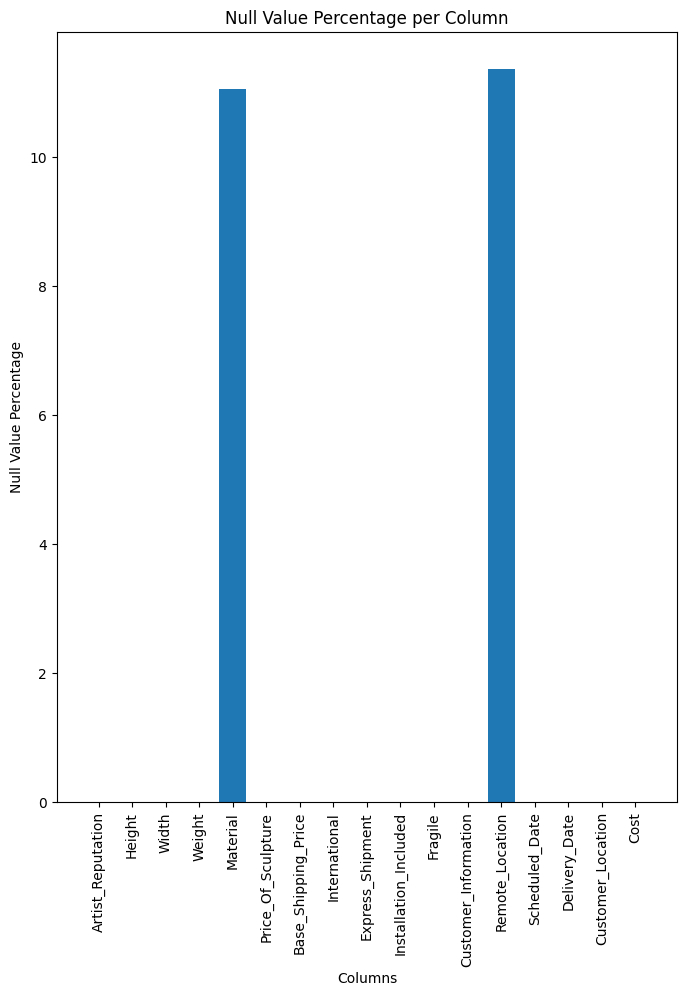

In [1181]:
plot_null_percentage(dataframe=df)

In [1182]:
df.head()

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location,Cost
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.290
1,0.28,5.0,4.0,63.6,Brass,6.83,15.00,No,No,No,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.960
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.290
3,0.15,17.0,6.0,324.0,Aluminium,3.44,11.94,Yes,Yes,Yes,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.230
4,0.99,44.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",-432.166


In [1183]:
def extract_state_and_city(df):
    # Extract state code (2-letter abbreviation) and city name
    df['State'] = df['Customer_Location'].str.extract(r',\s*([A-Z]{2})\s*\d+')
    df['City'] = df['Customer_Location'].str.extract(r'^(.*?),')
    
    return df

In [1184]:
# Apply the function to the DataFrame column
df=extract_state_and_city(df=df)

In [1185]:
df

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location,Cost,State,City
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.290,OH,New Michelle
1,0.28,5.0,4.0,63.6,Brass,6.83,15.00,No,No,No,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.960,WY,New Michaelport
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.290,WA,Bowmanshire
3,0.15,17.0,6.0,324.0,Aluminium,3.44,11.94,Yes,Yes,Yes,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.230,PA,Aprilside
4,0.99,44.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",-432.166,AL,Maddenberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5908,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335",872.430,VT,New Robert
5909,0.67,15.0,6.0,18981.0,NaN,67.18,27.72,No,No,No,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766",1347.020,VA,New Joshua
5910,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,Yes,Wealthy,No,04/10/19,04/09/19,"Lake Kelly, MA 80823",354.550,MA,Lake Kelly
5911,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,No,Working Class,Yes,03/10/19,03/12/19,"Hintonberg, UT 35006",5037.500,UT,Hintonberg


In [1186]:
df.drop(columns=['Scheduled_Date','Delivery_Date'],axis=1,inplace=True)


In [1187]:
df

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Fragile,Customer_Information,Remote_Location,Customer_Location,Cost,State,City
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,No,Working Class,No,"New Michelle, OH 50777",-283.290,OH,New Michelle
1,0.28,5.0,4.0,63.6,Brass,6.83,15.00,No,No,No,No,Working Class,No,"New Michaelport, WY 12072",-159.960,WY,New Michaelport
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Yes,Working Class,Yes,"Bowmanshire, WA 19241",-154.290,WA,Bowmanshire
3,0.15,17.0,6.0,324.0,Aluminium,3.44,11.94,Yes,Yes,Yes,No,Working Class,No,"Aprilside, PA 52793",-159.230,PA,Aprilside
4,0.99,44.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,No,Wealthy,No,"Maddenberg, AL 43096",-432.166,AL,Maddenberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5908,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,No,Wealthy,Yes,"New Robert, VT 85335",872.430,VT,New Robert
5909,0.67,15.0,6.0,18981.0,NaN,67.18,27.72,No,No,No,No,Working Class,No,"New Joshua, VA 35766",1347.020,VA,New Joshua
5910,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,Yes,Wealthy,No,"Lake Kelly, MA 80823",354.550,MA,Lake Kelly
5911,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,No,Working Class,Yes,"Hintonberg, UT 35006",5037.500,UT,Hintonberg


In [1188]:
#df.drop(columns=['Transport'], inplace=True)

In [1189]:
df.dropna(subset=['Material'], inplace=True)



In [1190]:
df.shape

(5260, 17)

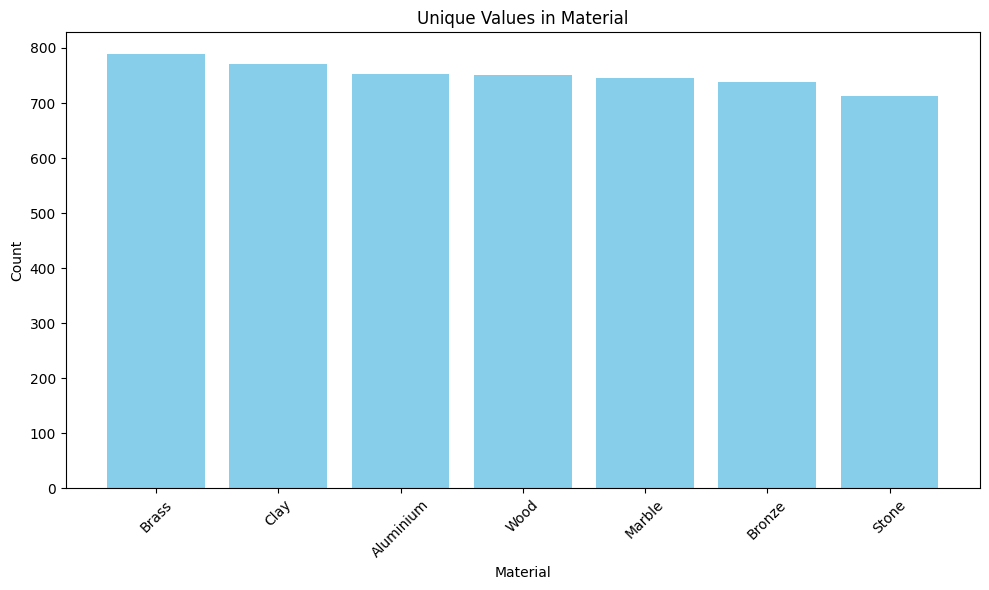

In [1191]:
def plot_unique_values_column(dataframe, column_label):
    # Extract the unique values from the specified column
    unique_values = dataframe[column_label].unique()
    
    # Create a bar plot to visualize the unique values
    plt.figure(figsize=(10, 6))
    plt.bar(unique_values, dataframe[column_label].value_counts(), color='skyblue')
    
    plt.xlabel(column_label)
    plt.ylabel('Count')
    plt.title(f'Unique Values in {column_label}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()
plot_unique_values_column(dataframe=df,column_label='Material')

Remote Location

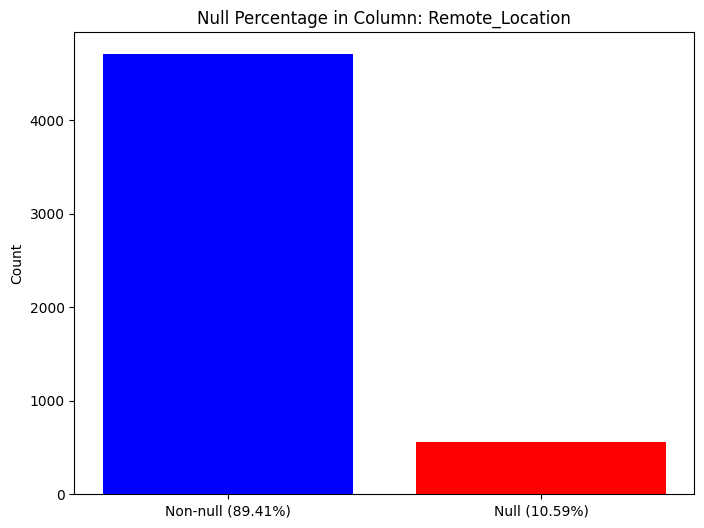

In [1192]:
def plot_null_percentage(dataframe, column_label):
    if column_label not in dataframe.columns:
        print("Column not found in the DataFrame.")
        return
    
    null_percent = (dataframe[column_label].isnull().sum() / len(dataframe)) * 100
    
    plt.figure(figsize=(8, 6))
    plt.bar([f"Non-null ({100 - null_percent:.2f}%)", f"Null ({null_percent:.2f}%)"], 
            [len(dataframe) - dataframe[column_label].isnull().sum(), dataframe[column_label].isnull().sum()],
            color=['blue', 'red'])
    plt.title(f"Null Percentage in Column: {column_label}")
    plt.ylabel("Count")
    plt.show()
    
plot_null_percentage(dataframe=df,column_label='Remote_Location')

In [1193]:
import random

In [1194]:

def fill_nan_with_random_category(df, column_name):
    # Get unique categories excluding NaN
    unique_categories = df[column_name].dropna().unique()
    
    # Generate random indices
    random_indices = [random.choice(unique_categories) for _ in range(df[column_name].isna().sum())]
    
    # Fill NaN values with random categories
    df.loc[df[column_name].isna(), column_name] = random_indices
    
    return df

df=fill_nan_with_random_category(df=df,column_name='Remote_Location')

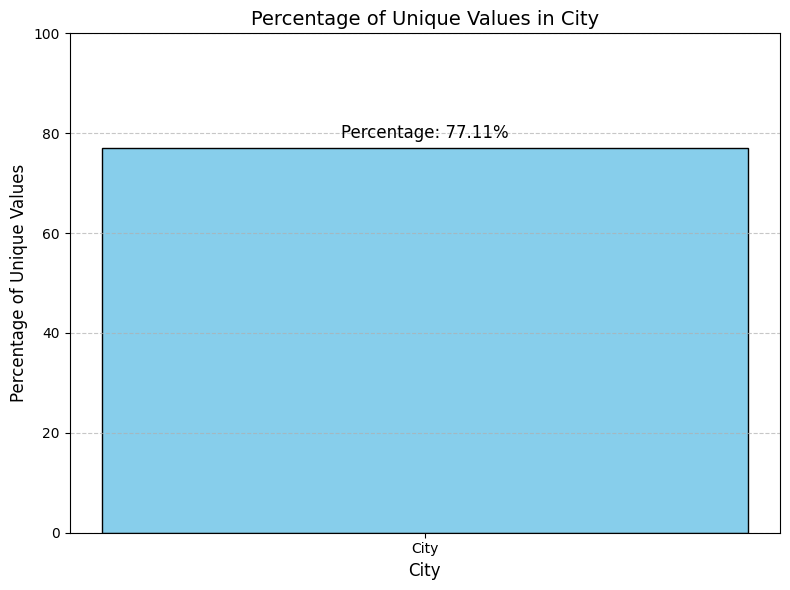

In [1195]:
def plot_unique_value_percentage_column(dataframe, column_label):
    # Calculate the percentage of unique values
    unique_count = len(dataframe[column_label].unique())
    total_count = len(dataframe)
    unique_percentage = (unique_count / total_count) * 100

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar([column_label], [unique_percentage], color='skyblue', edgecolor='black')
    plt.xlabel(column_label, fontsize=12)
    plt.ylabel("Percentage of Unique Values", fontsize=12)
    plt.title(f"Percentage of Unique Values in {column_label}", fontsize=14)
    plt.ylim(0, 100)

    # Add unique percentage text on the plot
    plt.text(0, unique_percentage + 2, f"Percentage: {unique_percentage:.2f}%", ha='center', fontsize=12)

    # Add grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.tight_layout()
    plt.show()
    
plot_unique_value_percentage_column(dataframe=df,column_label='City')

City conssts of lot of unique values and hence it is Difficult to find any relation relating to cost in this case 
- Dropping City

In [1196]:
df.drop(columns=['City'],axis=1,inplace=True)
df.drop(columns=['State'],axis=1,inplace=True)
df.drop(columns=['Customer_Location'],axis=1,inplace=True)

In [1197]:
df.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Fragile',
       'Customer_Information', 'Remote_Location', 'Cost'],
      dtype='object')

International

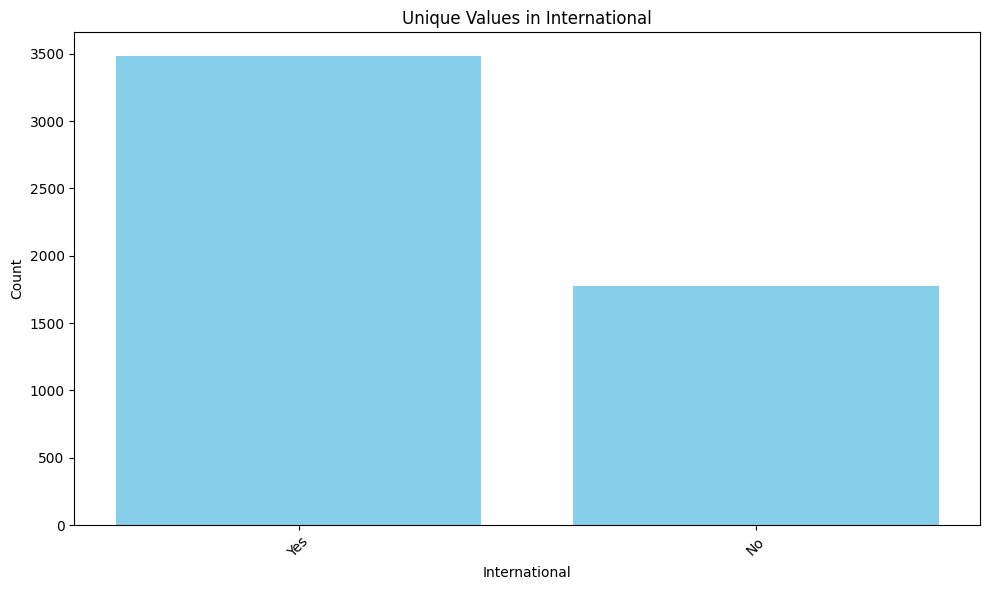

In [1198]:
plot_unique_values_column(dataframe=df,column_label='International')

We can see International and Domestic Deliveries 

<Figure size 1000x600 with 0 Axes>

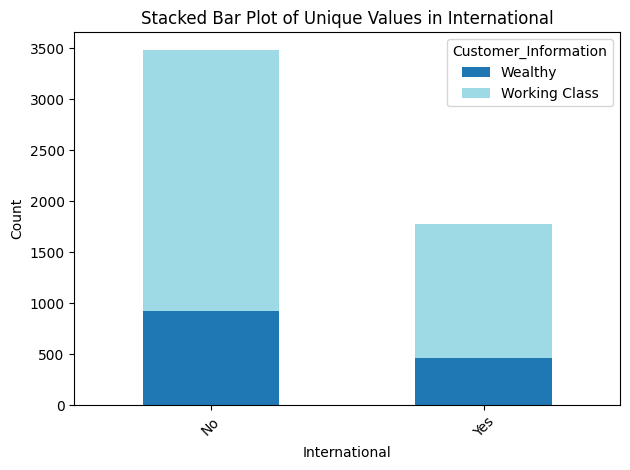

In [1199]:
def plot_unique_values_column_hue(dataframe, column_label, hue_column=None):
    # Group the data by the specified column and hue column (if provided)
    if hue_column:
        grouped = dataframe.groupby([column_label, hue_column]).size().unstack(fill_value=0)
    else:
        grouped = dataframe[column_label].value_counts().to_frame()

    # Create a stacked bar plot
    plt.figure(figsize=(10, 6))
    grouped.plot(kind='bar', stacked=True, colormap='tab20')
    
    plt.xlabel(column_label)
    plt.ylabel('Count')
    plt.title(f'Stacked Bar Plot of Unique Values in {column_label}')
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.tight_layout()
    
    plt.show()
    
plot_unique_values_column_hue(dataframe=df,column_label='International',hue_column='Customer_Information')

For international Shipping or Domestic Shipping most of it belongs to Working class 

<Figure size 1000x600 with 0 Axes>

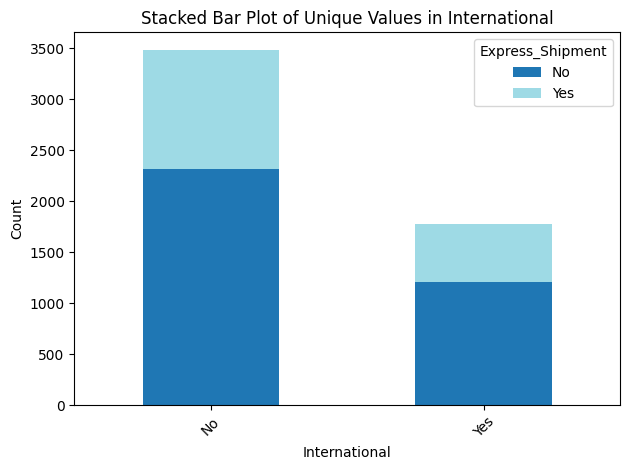

In [1200]:
plot_unique_values_column_hue(dataframe=df,column_label='International',hue_column='Express_Shipment')

Remote Location

<Figure size 1000x600 with 0 Axes>

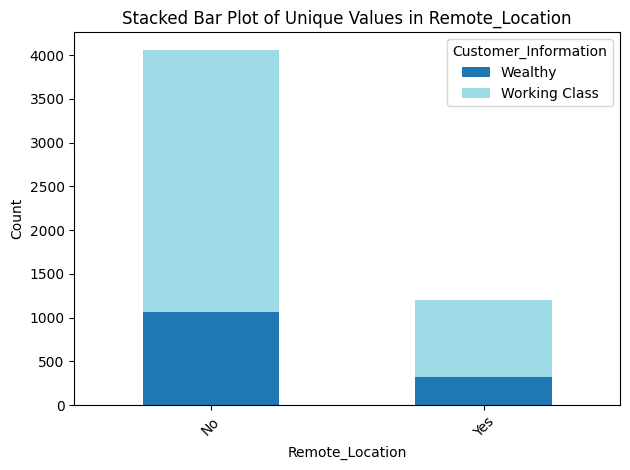

In [1201]:
plot_unique_values_column_hue(dataframe=df,column_label='Remote_Location',hue_column='Customer_Information')

Shipping Majoraliy is observed no to be in Remote location 
- In remote location Working Class Dominates 


In [1202]:
df = df.reset_index(drop=True)


In [1203]:
df.isna().sum()

Artist_Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price_Of_Sculpture       0
Base_Shipping_Price      0
International            0
Express_Shipment         0
Installation_Included    0
Fragile                  0
Customer_Information     0
Remote_Location          0
Cost                     0
dtype: int64

Encoding Categorical Columns

In [1204]:
df.shape

(5260, 14)

In [1205]:
numerical_columns,categorical_columns=separate_numerical_categorical_columns(df=df)

In [1206]:
numerical_columns

['Artist_Reputation',
 'Height',
 'Width',
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price',
 'Cost']

In [1207]:
categorical_columns

['Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Fragile',
 'Customer_Information',
 'Remote_Location']

In [1208]:
df[categorical_columns]

,Material,International,Express_Shipment,Installation_Included,Fragile,Customer_Information,Remote_Location
0,Brass,Yes,Yes,No,No,Working Class,No
1,Brass,No,No,No,No,Working Class,No
2,Clay,No,No,No,Yes,Working Class,Yes
3,Aluminium,Yes,Yes,Yes,No,Working Class,No
4,Wood,No,Yes,No,No,Wealthy,No
...,...,...,...,...,...,...,...
5255,Aluminium,No,No,Yes,No,Working Class,No
5256,Brass,Yes,Yes,No,No,Wealthy,Yes
5257,Clay,Yes,No,No,Yes,Wealthy,No
5258,Stone,No,Yes,No,No,Working Class,Yes


In [1209]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [1210]:
numerical_columns,categorical_columns=separate_numerical_categorical_columns(df=df)

In [1211]:
def create_one_hot_encoded_df(data, categorical_columns):
    """
    Create a DataFrame with one-hot encoded categorical columns.
    
    Parameters:
        data (pd.DataFrame): The input DataFrame.
        categorical_columns (list): List of column names to one-hot encode.
        
    Returns:
        encoded_df (pd.DataFrame): DataFrame with one-hot encoded columns.
    """
    encoder = OneHotEncoder()
    encoded_features = encoder.fit_transform(data[categorical_columns])
    encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
    non_categorical_columns = data.drop(categorical_columns, axis=1)
    final_df = pd.concat([non_categorical_columns, encoded_df], axis=1)
    
    return final_df

In [1212]:
df.shape

(5260, 14)

In [1213]:
df.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Fragile',
       'Customer_Information', 'Remote_Location', 'Cost'],
      dtype='object')

In [1214]:
df=create_one_hot_encoded_df(data=df, categorical_columns=categorical_columns)


In [1215]:
df

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price,Cost,Material_Aluminium,Material_Brass,Material_Bronze,...,Express_Shipment_No,Express_Shipment_Yes,Installation_Included_No,Installation_Included_Yes,Fragile_No,Fragile_Yes,Customer_Information_Wealthy,Customer_Information_Working Class,Remote_Location_No,Remote_Location_Yes
0,0.26,17.0,6.0,4128.0,13.91,16.27,-283.290,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.28,5.0,4.0,63.6,6.83,15.00,-159.960,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.07,8.0,5.0,237.0,4.96,21.18,-154.290,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.15,17.0,6.0,324.0,3.44,11.94,-159.230,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.99,44.0,19.0,1178.0,6.16,16.88,-432.166,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,0.45,12.0,20.0,10851.0,30.83,67.70,1076.850,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
5256,0.37,37.0,10.0,16551.0,28.28,38.46,872.430,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5257,0.68,19.0,8.0,587.0,6.92,10.38,354.550,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5258,0.02,33.0,9.0,1269377.0,2929.13,69.76,5037.500,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [1216]:
df.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Price_Of_Sculpture',
       'Base_Shipping_Price', 'Cost', 'Material_Aluminium', 'Material_Brass',
       'Material_Bronze', 'Material_Clay', 'Material_Marble', 'Material_Stone',
       'Material_Wood', 'International_No', 'International_Yes',
       'Express_Shipment_No', 'Express_Shipment_Yes',
       'Installation_Included_No', 'Installation_Included_Yes', 'Fragile_No',
       'Fragile_Yes', 'Customer_Information_Wealthy',
       'Customer_Information_Working Class', 'Remote_Location_No',
       'Remote_Location_Yes'],
      dtype='object')

In [1217]:
df.shape

(5260, 26)

In [1218]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [1219]:
X=df.drop(columns=['Cost'],axis=1)
y=df['Cost']

In [1220]:
def standardize_columns(dataframe, columns_to_standardize):
    """
    Standardizes the specified columns in the given DataFrame using StandardScaler.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns_to_standardize (list): List of column names to standardize.

    Returns:
    pd.DataFrame: A new DataFrame with specified columns standardized.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataframe[columns_to_standardize])
    
    # Create a new DataFrame with standardized data and same index/columns
    scaled_df = pd.DataFrame(scaled_data, columns=columns_to_standardize, index=dataframe.index)
    
    # Concatenate non-standardized columns with standardized columns
    non_standardized_cols = dataframe.drop(columns=columns_to_standardize)
    final_df = pd.concat([non_standardized_cols, scaled_df], axis=1)
    
    return final_df



#df=standardize_columns(dataframe=X,columns_to_standardize=numerical_columns)


Log Transform

In [1221]:
def log_transform_columns(dataframe, columns, plot=True):
    """
    Perform a log transformation on specified numerical columns of a DataFrame.
    
    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        columns (list): List of column names to be log-transformed.
        plot (bool): Whether to plot before and after KDE plots. Default is True.
        
    Returns:
        pd.DataFrame: A new DataFrame with the specified columns log-transformed.
    """
    transformed_df = dataframe.copy()
    
    for col in columns:
        if col in transformed_df.columns:
            transformed_df[col] = np.log1p(transformed_df[col])  # Using np.log1p to avoid log(0)
    
    if plot:
        num_plots = len(columns)
        num_cols = 2  # Before and After plots
        num_rows = (num_plots + 1) // num_cols  # Add an extra row if needed
        
        plt.figure(figsize=(15, 5 * num_rows))
        
        for idx, col in enumerate(columns, start=1):
            plt.subplot(num_rows, num_cols, idx)
            sns.kdeplot(data=dataframe[col], label=f'Before {col}')
            sns.kdeplot(data=transformed_df[col], label=f'After {col}')
            plt.title(f'Log Transformation for Column {col}')
            plt.xlabel('Value')
            plt.ylabel('Density')
            plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    return transformed_df

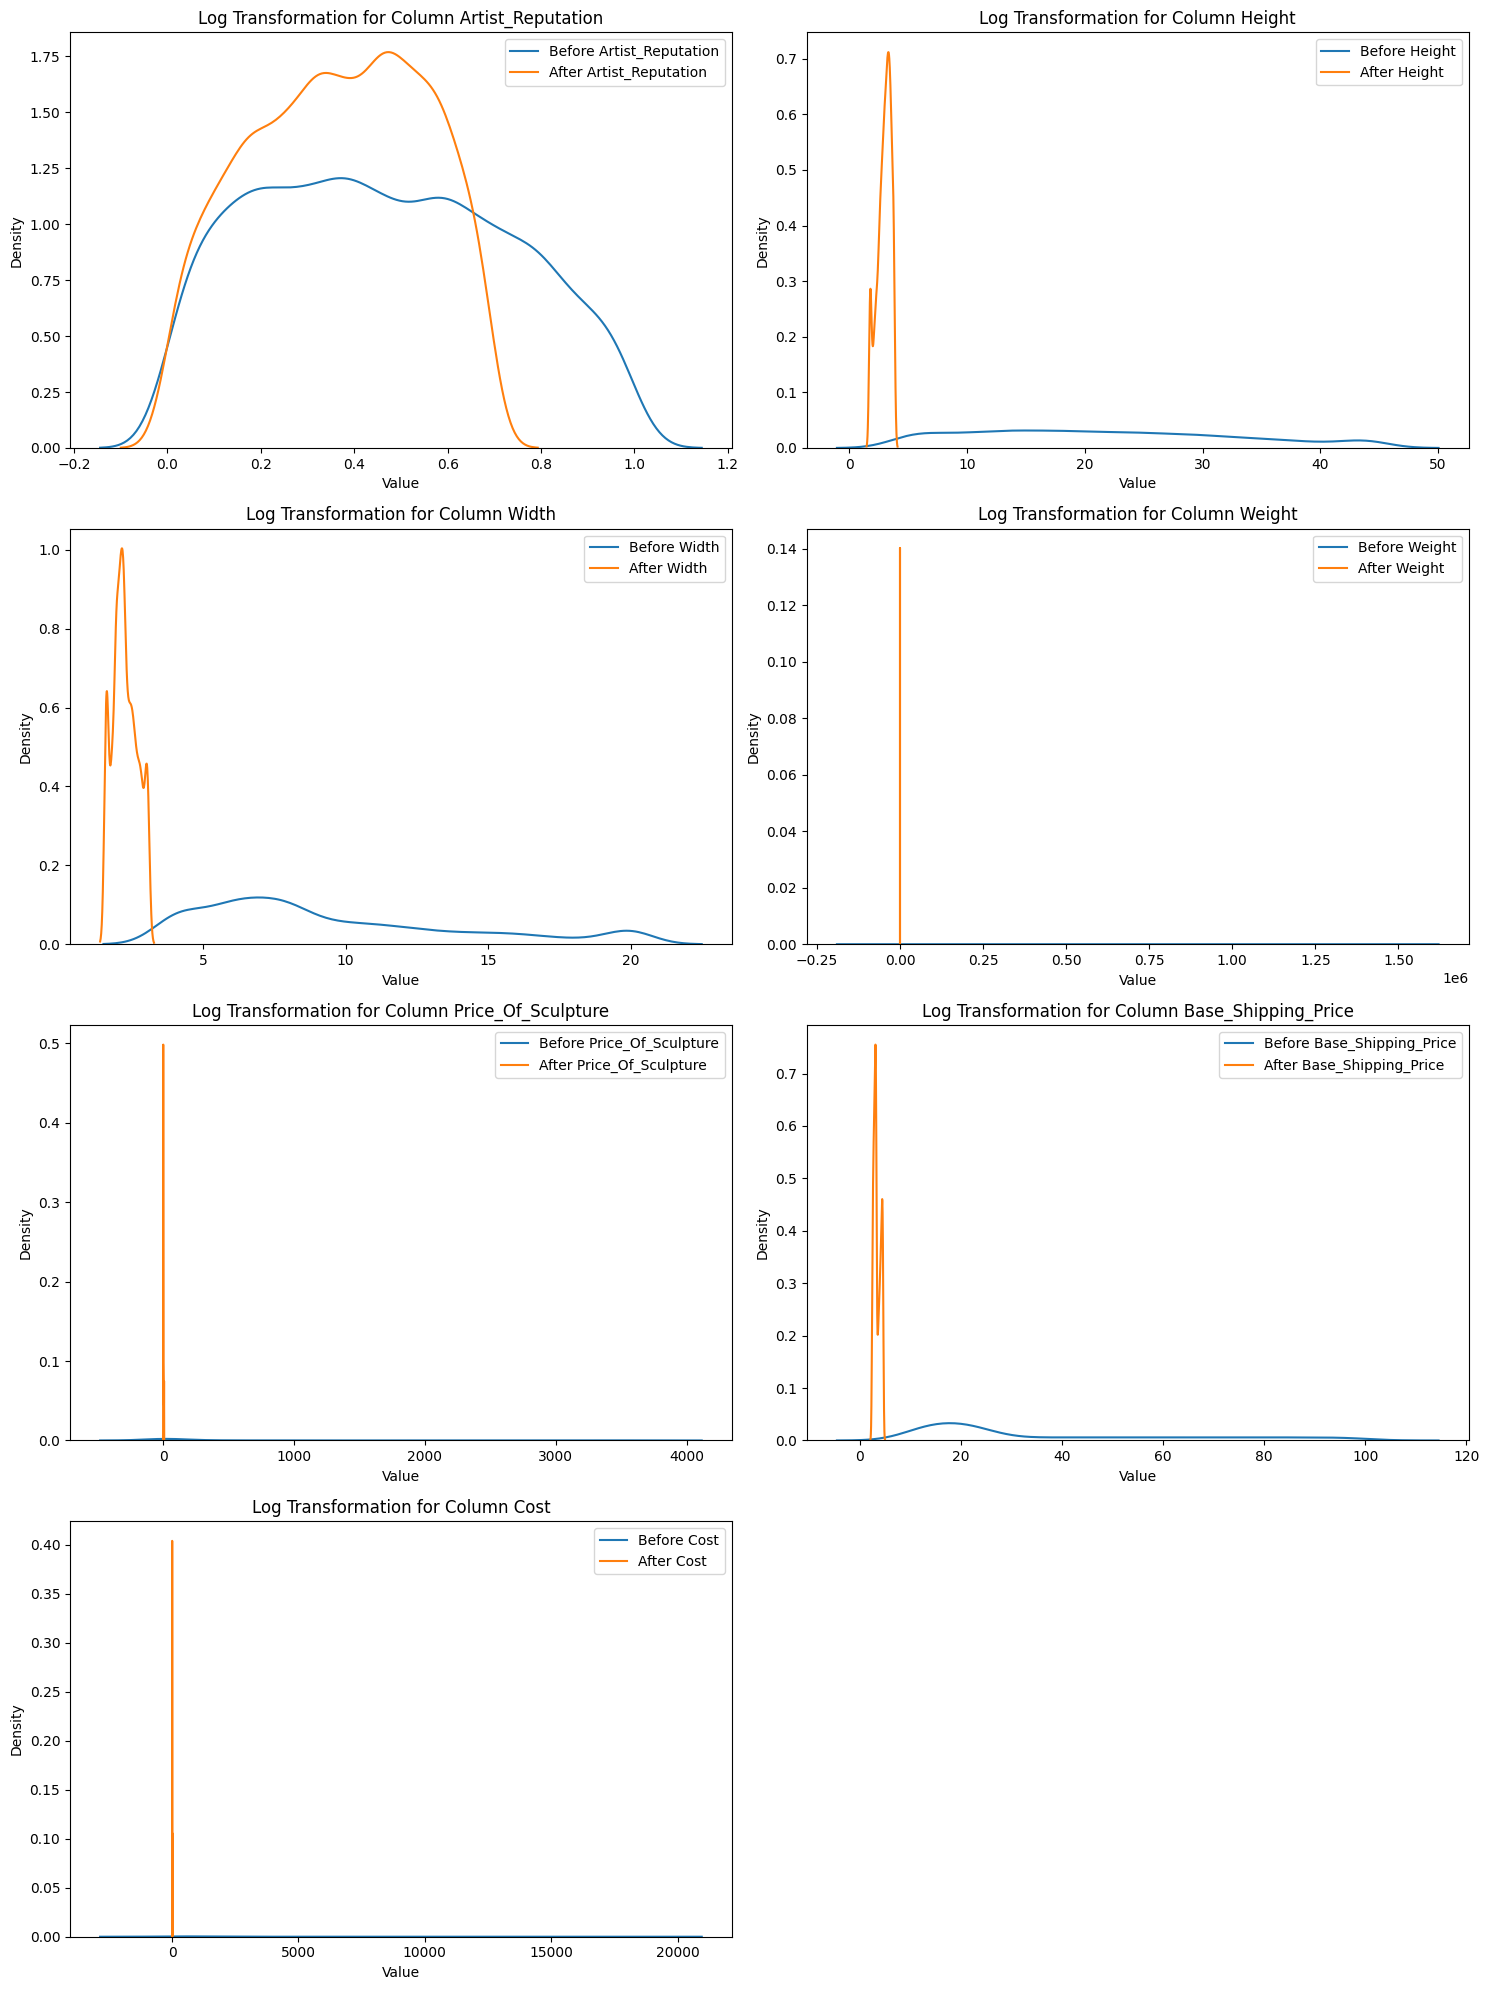

In [1222]:
df=log_transform_columns(dataframe=df,columns=numerical_columns)

In [1223]:
df

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price,Cost,Material_Aluminium,Material_Brass,Material_Bronze,...,Express_Shipment_No,Express_Shipment_Yes,Installation_Included_No,Installation_Included_Yes,Fragile_No,Fragile_Yes,Customer_Information_Wealthy,Customer_Information_Working Class,Remote_Location_No,Remote_Location_Yes
0,0.231112,2.890372,1.945910,8.325791,2.702032,2.848971,NaN,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.246860,1.791759,1.609438,4.168214,2.057963,2.772589,NaN,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.067659,2.197225,1.791759,5.472271,1.785070,3.099191,NaN,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.139762,2.890372,1.945910,5.783825,1.490654,2.560323,NaN,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.688135,3.806662,2.995732,7.072422,1.968510,2.883683,NaN,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,0.371564,2.564949,3.044522,9.292105,3.460409,4.229749,6.982724,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
5256,0.314811,3.637586,2.397895,9.714262,3.376905,3.675288,6.772428,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5257,0.518794,2.995732,2.197225,6.376727,2.069391,2.431857,5.873666,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5258,0.019803,3.526361,2.302585,14.054038,7.982802,4.259294,8.524864,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [1224]:
df.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Price_Of_Sculpture',
       'Base_Shipping_Price', 'Cost', 'Material_Aluminium', 'Material_Brass',
       'Material_Bronze', 'Material_Clay', 'Material_Marble', 'Material_Stone',
       'Material_Wood', 'International_No', 'International_Yes',
       'Express_Shipment_No', 'Express_Shipment_Yes',
       'Installation_Included_No', 'Installation_Included_Yes', 'Fragile_No',
       'Fragile_Yes', 'Customer_Information_Wealthy',
       'Customer_Information_Working Class', 'Remote_Location_No',
       'Remote_Location_Yes'],
      dtype='object')

### Train Test Split

In [1225]:
from sklearn.model_selection import train_test_split

In [1226]:
def perform_train_test_split(X, y, test_size=0.2, random_state=None):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [1227]:
X_train, X_test, y_train, y_test=perform_train_test_split(X=X,y=y)

In [1228]:
X_train

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price,Material_Aluminium,Material_Brass,Material_Bronze,Material_Clay,...,Express_Shipment_No,Express_Shipment_Yes,Installation_Included_No,Installation_Included_Yes,Fragile_No,Fragile_Yes,Customer_Information_Wealthy,Customer_Information_Working Class,Remote_Location_No,Remote_Location_Yes
2250,0.72,22.0,7.0,98104.0,221.18,82.11,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3738,0.48,9.0,5.0,63.6,5.13,20.07,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4610,0.01,15.0,6.0,337.0,4.25,24.77,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2553,0.55,31.0,14.0,43540.0,135.00,60.94,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
602,0.25,14.0,7.0,54449.0,35.89,83.07,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,0.31,25.0,8.0,13248.0,49.59,48.81,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
748,0.73,44.0,8.0,56025.0,164.92,80.51,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4878,0.65,22.0,16.0,39040.0,35.45,42.61,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2161,0.49,26.0,12.0,7944.0,20.62,26.88,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Model Training

In [1229]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [1230]:

models_dict = {
    "Random Forest Regression": RandomForestRegressor(),
    "XGBoost Regression": xgb.XGBRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor()
}

In [1231]:
feature_selection= {
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()}


In [1232]:
df

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price,Cost,Material_Aluminium,Material_Brass,Material_Bronze,...,Express_Shipment_No,Express_Shipment_Yes,Installation_Included_No,Installation_Included_Yes,Fragile_No,Fragile_Yes,Customer_Information_Wealthy,Customer_Information_Working Class,Remote_Location_No,Remote_Location_Yes
0,0.231112,2.890372,1.945910,8.325791,2.702032,2.848971,NaN,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.246860,1.791759,1.609438,4.168214,2.057963,2.772589,NaN,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.067659,2.197225,1.791759,5.472271,1.785070,3.099191,NaN,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.139762,2.890372,1.945910,5.783825,1.490654,2.560323,NaN,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.688135,3.806662,2.995732,7.072422,1.968510,2.883683,NaN,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,0.371564,2.564949,3.044522,9.292105,3.460409,4.229749,6.982724,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
5256,0.314811,3.637586,2.397895,9.714262,3.376905,3.675288,6.772428,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5257,0.518794,2.995732,2.197225,6.376727,2.069391,2.431857,5.873666,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5258,0.019803,3.526361,2.302585,14.054038,7.982802,4.259294,8.524864,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [1233]:
df.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Price_Of_Sculpture',
       'Base_Shipping_Price', 'Cost', 'Material_Aluminium', 'Material_Brass',
       'Material_Bronze', 'Material_Clay', 'Material_Marble', 'Material_Stone',
       'Material_Wood', 'International_No', 'International_Yes',
       'Express_Shipment_No', 'Express_Shipment_Yes',
       'Installation_Included_No', 'Installation_Included_Yes', 'Fragile_No',
       'Fragile_Yes', 'Customer_Information_Wealthy',
       'Customer_Information_Working Class', 'Remote_Location_No',
       'Remote_Location_Yes'],
      dtype='object')

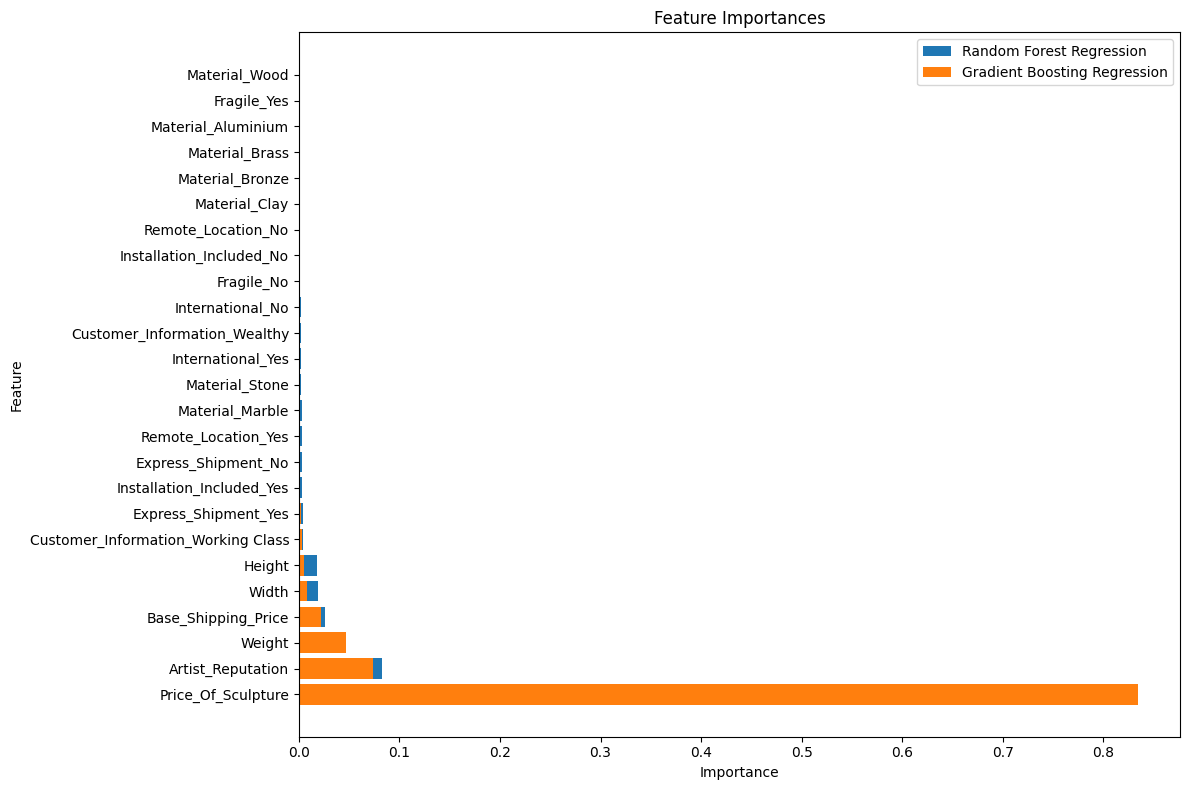

In [1100]:

feature_names = X_train.columns

# Create a dictionary of models
feature_selection = {
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Initialize dictionaries to store feature importances
feature_importances = {model_name: None for model_name in feature_selection.keys()}

# Fit each model and collect feature importances
for model_name, model in feature_selection.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        feature_importances[model_name] = model.feature_importances_

# Plot feature importances for each model with feature names
plt.figure(figsize=(12, 8))
for model_name, importances in feature_importances.items():
    if importances is not None:
        sorted_idx = np.argsort(importances)[::-1]
        features_ordered = np.array(feature_names)[sorted_idx]
        plt.barh(range(X_train.shape[1]), importances[sorted_idx], align='center', label=model_name)
        plt.yticks(range(X_train.shape[1]), features_ordered)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.legend()
plt.tight_layout()
plt.show()

NUmerical Features are having considerable Importance hence NO chnages

In [1101]:
from sklearn.metrics import r2_score

In [979]:
def train_and_plot(models_dict, X_train, y_train, X_test, y_test):
    """
    Train regression models, evaluate on test data, and plot R2 scores.

    Parameters:
        models_dict (dict): Dictionary containing regression models.
        X_train (array-like): Training data features.
        y_train (array-like): Training data labels.
        X_test (array-like): Test data features.
        y_test (array-like): Test data labels.

    Returns:
        None (plots R2 scores).
    """

    r2_scores = {}  # To store R2 scores for each model

    for model_name, model in models_dict.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores[model_name] = r2

    # Sort models by R2 score in ascending order
    sorted_models = sorted(r2_scores.items(), key=lambda x: x[1])

    # Plot R2 scores in ascending order
    plt.figure(figsize=(10, 6))
    plt.bar([model[0] for model in sorted_models], [model[1] for model in sorted_models])
    plt.xlabel('Model')
    plt.ylabel('R-squared Score')
    plt.title('R-squared Scores for Regression Models')
    plt.xticks(rotation=45)

    # Display R2 score values on the bars
    for model_name, r2 in sorted_models:
        plt.text(model_name, r2 + 0.005, f'{r2:.3f}', ha='center', va='bottom')

    plt.tight_layout()

    plt.show()

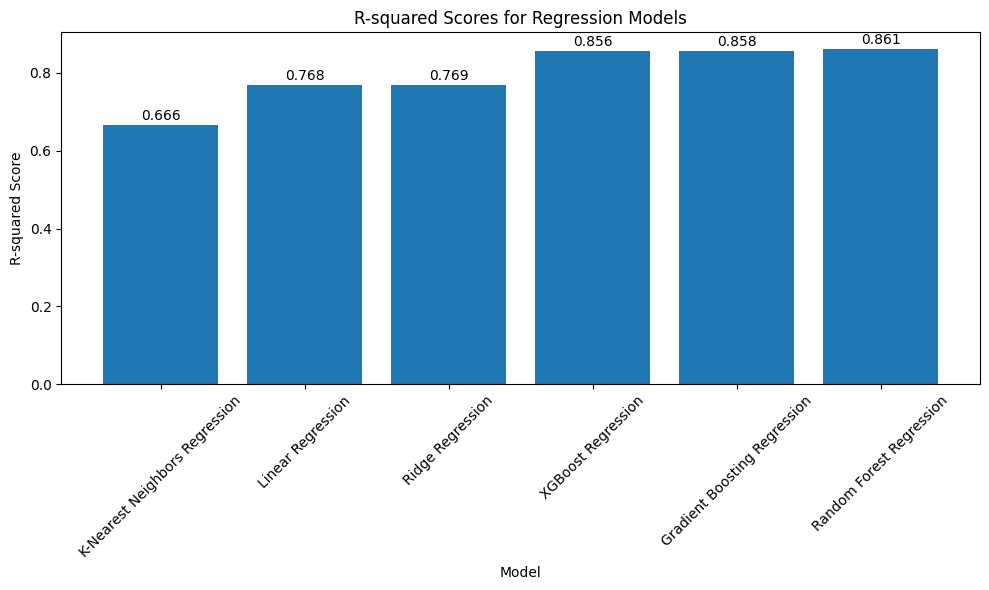

In [1234]:
train_and_plot(models_dict=models_dict,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

Models Selected for Pram optimisation
- XG Boost
- Random Forest
- Gradient Boosting 

In [1235]:
models_dict = {
    "Random Forest Regression": RandomForestRegressor(),
    "XGBoost Regression": xgb.XGBRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

In [1236]:
param_dict = {
    "Random Forest Regression": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost Regression": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    },
    "Gradient Boosting Regression": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.8, 1.0],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}

In [1237]:
df.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Price_Of_Sculpture',
       'Base_Shipping_Price', 'Cost', 'Material_Aluminium', 'Material_Brass',
       'Material_Bronze', 'Material_Clay', 'Material_Marble', 'Material_Stone',
       'Material_Wood', 'International_No', 'International_Yes',
       'Express_Shipment_No', 'Express_Shipment_Yes',
       'Installation_Included_No', 'Installation_Included_Yes', 'Fragile_No',
       'Fragile_Yes', 'Customer_Information_Wealthy',
       'Customer_Information_Working Class', 'Remote_Location_No',
       'Remote_Location_Yes'],
      dtype='object')

In [1238]:
import optuna

In [1239]:
class HyperparameterOptimizer:
    def __init__(self, X_train, X_test, y_train, y_test, models_dict, param_dict):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models_dict = models_dict
        self.param_dict = param_dict
        self.study_dict = {}

    def objective(self, trial, model_name):
        params = self.param_dict[model_name]
        model = self.models_dict[model_name]

        model_params = {}
        for param, values in params.items():
            model_params[param] = trial.suggest_categorical(param, values)

        model.set_params(**model_params)
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        r2 = r2_score(self.y_test, y_pred)
        return r2

    def optimize_models(self, n_trials=10):
        best_models = {}
        r2_scores = {}
        
        for model_name in self.models_dict.keys():
            study = optuna.create_study(direction="maximize")
            study.optimize(lambda trial: self.objective(trial, model_name), n_trials=n_trials)
            best_trial = study.best_trial
            best_params = best_trial.params
            
            model = self.models_dict[model_name]
            model.set_params(**best_params)
            model.fit(self.X_train, self.y_train)
            best_models[model_name] = model
            r2_scores[model_name] = best_trial.value
        
        r2_df = pd.DataFrame.from_dict(r2_scores, orient="index", columns=["R2 Score"])
        return best_models, r2_df


In [1240]:
optimizer = HyperparameterOptimizer(X_train, X_test, y_train, y_test, models_dict, param_dict)
best_models,r2_df = optimizer.optimize_models()

[I 2023-08-30 09:42:34,075] A new study created in memory with name: no-name-bedcb38f-15bc-4e87-8020-09c7c7fd0992
[I 2023-08-30 09:42:44,694] Trial 0 finished with value: 0.8676578172926548 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8676578172926548.
[I 2023-08-30 09:42:56,194] Trial 1 finished with value: 0.861352223076426 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8676578172926548.
[I 2023-08-30 09:42:59,392] Trial 2 finished with value: 0.8688270758258041 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.8688270758258041.
[I 2023-08-30 09:43:07,990] Trial 3 finished with value: 0.8691026949899248 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 3 with

In [1241]:
best_model=best_models['XGBoost Regression']


In [178]:
best_model

NameError: name 'best_model' is not defined

In [751]:
r2_df

,R2 Score
Random Forest Regression,0.864328
XGBoost Regression,0.850199
Gradient Boosting Regression,0.854603


In [2474]:
import pickle

In [2475]:
def save_model_to_file(model, filename):
    try:
        with open(filename, 'wb') as file:
            pickle.dump(model, file)
        print(f"Model saved as {filename}")
    except Exception as e:
        print(f"An error occurred while saving the model: {e}")


In [2476]:
save_model_to_file(model=best_model,filename='model.pkl')

Model saved as model.pkl
